<body>
	<h1>About Me</h1>
	<p>
		Hi, my name is <strong>Zakari</strong> and I am currently a Bcom (Accounting) student at the <strong>University of Cape Coast, Ghana</strong>. I am passionate about analyzing, visualizing and building predictive Machine Learning models in python.
	</p>

<p>
        I have used jupyter notebook for a variety of tasks, including cleaning and preprocessing data, training ML models, and creating interactive visualizations.
</p>

<p>
	I hope you enjoy reading my notebook!
</p>
</body>
</html>

<body>
	<h1>About the Dataset</h1>
<p>
The telecoms churn dataset contains information about customers of a telecom company and whether they churned (cancelled their service) or not. It includes various features such as customer demograhics (age, gender, etc) and service usage data (number of calls, minutes, billing method, etc).
</p>

<p>This dataset consists of 7043 examples and 21 features, and is commonly used in machine learning and data analysis as a benchmark for predicting customer churn. It can be used to develop models that can identify at-risk customers and take steps to prevent churn, potentially leading to increased customer retention and revenue for the company.</p>

<p>For more info, refer to the following resources:</p>
<ul>
<li><a href="https://www.kaggle.com/blastchar/telco-customer-churn">Kaggle</a></li>
<li><a href="https://archive.ics.uci.edu/ml/datasets/Telecom+Customer+Churn">UCL</a></li>
</ul>

<p>In this notebook, I have built 5 ML models including:</p>
<ul>
<li>Logistics Regression</li>
<li>K-Nearest Neighbors Classifier</li>
<li>Decision Tree Classifier</li>
<li>Support Vector Machine Classifier</li>
<li>Random Forest Classifier</li>
</ul>
</body>
</html>

In [1]:
import os
import pandas as pd
from pandas import DataFrame
pd.set_option('display.max_columns', 50)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsTransformer, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from scipy.stats.contingency import chi2_contingency
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, log_loss, hinge_loss, recall_score, precision_score, f1_score, accuracy_score, plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, OrdinalEncoder
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import compute_class_weight
from sklearn.model_selection import cross_val_score, StratifiedGroupKFold, StratifiedKFold, RandomizedSearchCV
from scipy.stats import normaltest, shapiro
import plotly.express as px
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE, SVMSMOTE
from imblearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')
set_config(display='diagram')
plt.style.use('seaborn-darkgrid')

In [2]:
# Reading the data into pandas dataframe

df = pd.read_excel('./OneDrive/Desktop/Text Classification/extracted_files/Telco_customer_churn.xlsx')
df.head(4)

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   

                 Lat Long   Latitude   Longitude  Gender Senior Citizen  \
0  33.964131, -118.272783  33.964131 -118.272783    Male             No   
1   34.059281, -118.30742  34.059281 -118.307420  Female             No   
2  34.048013, -118.293953  34.048013 -118.293953  Female             No   
3  34.062125, -118.315709  34.062125 -118.315709  Female             No   

  Partner Dependents  Tenure Months Phone Service Multiple Lines  \
0      No         No              2           Yes             No   
1      No        Yes              2           Yes             No   
2      No        Yes              8           Yes            Yes   
3     Yes        Yes             28           Yes            Yes   

  Internet Service Online Security Online Backup Device Protection  \
0              DSL             Yes           Yes                No   
1      Fiber optic              No            No                No   
2      Fiber optic              No            No               Yes   
3      Fiber optic              No            No               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   

  Paperless Billing    Payment Method  Monthly Charges Total Charges  \
0               Yes      Mailed check            53.85        108.15   
1               Yes  Electronic check            70.70        151.65   
2               Yes  Electronic check            99.65         820.5   
3               Yes  Electronic check           104.80       3046.05   

  Churn Label  Churn Value  Churn Score  CLTV                  Churn Reason  
0         Yes            1           86  3239  Competitor made better offer  
1         Yes            1           67  2701                         Moved  
2         Yes            1           86  5372                         Moved  
3         Yes            1           84  5003                         Moved

In [3]:
df.shape

(7043, 33)

# EDA

In [4]:
#Displaying summary statistics of the numeric columnsb
df.describe().style.background_gradient(axis=0)

In [5]:
#Displaying summary statistics of the categorical columns

df.select_dtypes(exclude='number').describe()

CustomerID        Country       State         City  \
count         7043           7043        7043         7043   
unique        7043              1           1         1129   
top     3668-QPYBK  United States  California  Los Angeles   
freq             1           7043        7043          305   

                      Lat Long Gender Senior Citizen Partner Dependents  \
count                     7043   7043           7043    7043       7043   
unique                    1652      2              2       2          2   
top     33.964131, -118.272783   Male             No      No         No   
freq                         5   3555           5901    3641       5416   

       Phone Service Multiple Lines Internet Service Online Security  \
count           7043           7043             7043            7043   
unique             2              3                3               3   
top              Yes             No      Fiber optic              No   
freq            6361           3390             3096            3498   

       Online Backup Device Protection Tech Support Streaming TV  \
count           7043              7043         7043         7043   
unique             3                 3            3            3   
top               No                No           No           No   
freq            3088              3095         3473         2810   

       Streaming Movies        Contract Paperless Billing    Payment Method  \
count              7043            7043              7043              7043   
unique                3               3                 2                 4   
top                  No  Month-to-month               Yes  Electronic check   
freq               2785            3875              4171              2365   

        Total Charges Churn Label                Churn Reason  
count          7043.0        7043                        1869  
unique         6531.0           2                          20  
top              20.2          No  Attitude of support person  
freq             11.0        5174                         192

From the table above, total charge is showing as categorical which should not be so. It is supposed to be a numeric column. We will deal with it later.

## Function to get unique values in the dataset

In [6]:
def get_unique(dataframe: DataFrame):
    
    cat_cols = dataframe.select_dtypes(exclude='number')
    uni_values = []
    counts = []
    
    for col in cat_cols.columns:
        
        uni_value, count = np.unique(np.array(cat_cols[col], dtype=str), return_counts=True)
        uni_values.append(uni_value); counts.append(count)

        
    return pd.DataFrame({
#         'column': cat_cols.columns,
        'dtype': cat_cols.dtypes,
        'unique_values' : uni_values,
        'counts' : [len(val) for val in uni_values],
        'values_count' : counts
    })

In [7]:
get_unique(df)

dtype                                      unique_values  \
CustomerID         object  [0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF...   
Country            object                                    [United States]   
State              object                                       [California]   
City               object  [Acampo, Acton, Adelanto, Adin, Agoura Hills, ...   
Lat Long           object  [32.555828, -117.040073, 32.578103, -117.01297...   
Gender             object                                     [Female, Male]   
Senior Citizen     object                                          [No, Yes]   
Partner            object                                          [No, Yes]   
Dependents         object                                          [No, Yes]   
Phone Service      object                                          [No, Yes]   
Multiple Lines     object                        [No, No phone service, Yes]   
Internet Service   object                             [DSL, Fiber optic, No]   
Online Security    object                     [No, No internet service, Yes]   
Online Backup      object                     [No, No internet service, Yes]   
Device Protection  object                     [No, No internet service, Yes]   
Tech Support       object                     [No, No internet service, Yes]   
Streaming TV       object                     [No, No internet service, Yes]   
Streaming Movies   object                     [No, No internet service, Yes]   
Contract           object               [Month-to-month, One year, Two year]   
Paperless Billing  object                                          [No, Yes]   
Payment Method     object  [Bank transfer (automatic), Credit card (autom...   
Total Charges      object  [ , 100.2, 100.25, 100.35, 100.4, 100.8, 100.9...   
Churn Label        object                                          [No, Yes]   
Churn Reason       object  [Attitude of service provider, Attitude of sup...   

                   counts                                       values_count  
CustomerID           7043  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
Country                 1                                             [7043]  
State                   1                                             [7043]  
City                 1129  [4, 4, 5, 4, 5, 4, 4, 8, 4, 4, 4, 4, 10, 4, 4,...  
Lat Long             1652  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...  
Gender                  2                                       [3488, 3555]  
Senior Citizen          2                                       [5901, 1142]  
Partner                 2                                       [3641, 3402]  
Dependents              2                                       [5416, 1627]  
Phone Service           2                                        [682, 6361]  
Multiple Lines          3                                  [3390, 682, 2971]  
Internet Service        3                                 [2421, 3096, 1526]  
Online Security         3                                 [3498, 1526, 2019]  
Online Backup           3                                 [3088, 1526, 2429]  
Device Protection       3                                 [3095, 1526, 2422]  
Tech Support            3                                 [3473, 1526, 2044]  
Streaming TV            3                                 [2810, 1526, 2707]  
Streaming Movies        3                                 [2785, 1526, 2732]  
Contract                3                                 [3875, 1473, 1695]  
Paperless Billing       2                                       [2872, 4171]  
Payment Method          4                           [1544, 1522, 2365, 1612]  
Total Charges        6531  [11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...  
Churn Label             2                                       [5174, 1869]  
Churn Reason           21  [135, 192, 130, 140, 189, 162, 6, 154, 57, 44,...

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '')

#From the dataframe above some columns are not useful for modelling and we are dropping them here.
df.drop('customerid count country state zipcode latlong'.split(), axis=1, inplace=True)

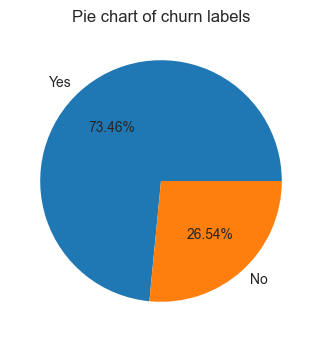

In [9]:
# Get a sense of the percentage of churn labels

fig = plt.figure(figsize=(7, 4), dpi=100)
plt.pie(df.churnlabel.value_counts(), autopct='%.2f%%', labels=df.churnlabel.unique())
plt.title('Pie chart of churn labels')
plt.show()

From the above plot the target is imbalanced

In [10]:
def churn_by_category(n_rows:int, n_cols:int, sub_grps:list):
    
    fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(17, 6), dpi=300)
    fig.suptitle('Churn by Category', fontsize=16, fontweight='bold')
    for ax, sg in zip(axes, sub_grps):
        pie1, _ = ax.pie(churn, radius=1.3, labels=churn.index, colors=(a(0.8), b(0.8)))
        plt.setp(pie1, animated=True, width=0.3, edgecolor='w')

        pie2, _ = ax.pie(sg.values.ravel(), labeldistance=0.7,
                         labels= [index.split()[0] for index in sg.index])
        plt.setp(pie2, width=0.4, edgecolor='w')
        ax.set_title(f'Churn by {sg.index.name}', fontsize=12)
#     plt.show()

In [11]:
by_gender = pd.crosstab(index=[df.churnlabel, df.gender], columns='freq').reset_index()
by_seniorcitizen = pd.crosstab(index=[df.churnlabel, df.seniorcitizen], columns='freq').reset_index()
by_paymentmethod = pd.crosstab(index=[df.churnlabel, df.paymentmethod], columns='freq').reset_index()

churn = df.churnlabel.value_counts()
sub_group1 = by_gender[['gender', 'freq']].set_index('gender')
sub_group2 = by_seniorcitizen[['seniorcitizen', 'freq']].set_index('seniorcitizen')
sub_group3 = by_paymentmethod[['paymentmethod', 'freq']].set_index('paymentmethod')

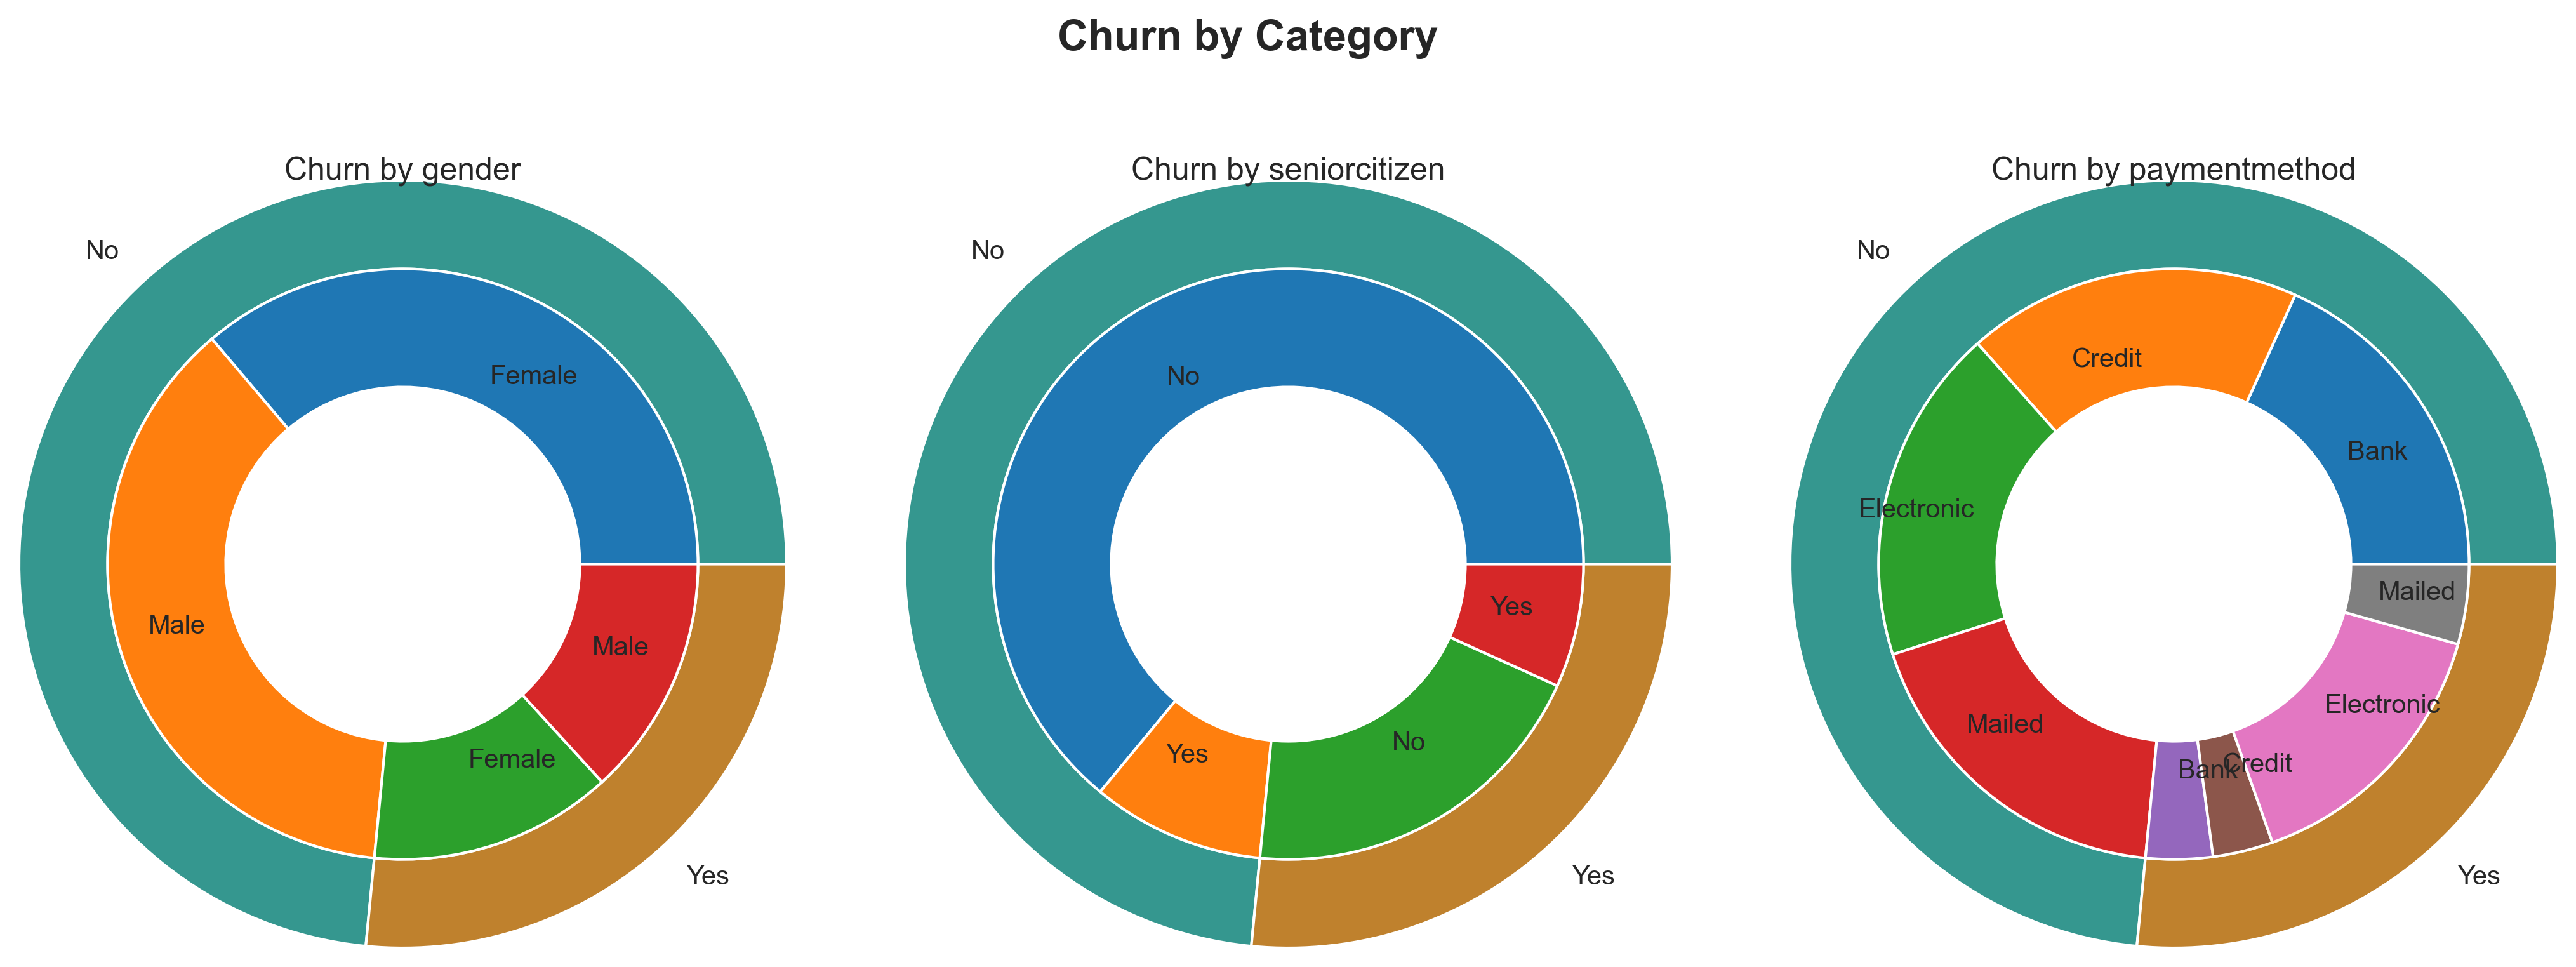

In [12]:
churn_by_category(1, 3, [sub_group1, sub_group2, sub_group3])

<Figure size 1800x1200 with 0 Axes>

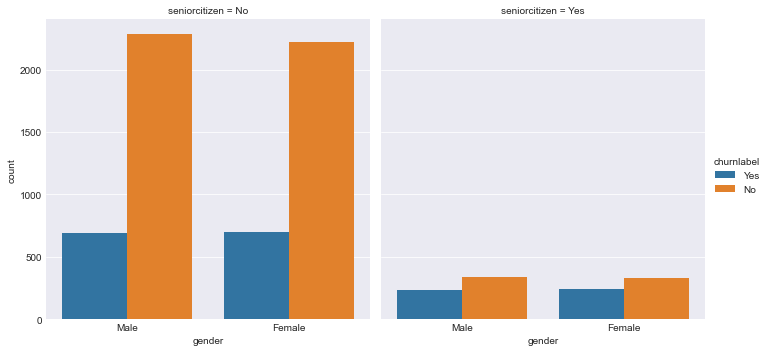

In [13]:
plt.figure(dpi=300)
sns.catplot(x='gender', hue='churnlabel', col='seniorcitizen', data=df, kind='count')
plt.show()

<AxesSubplot:>

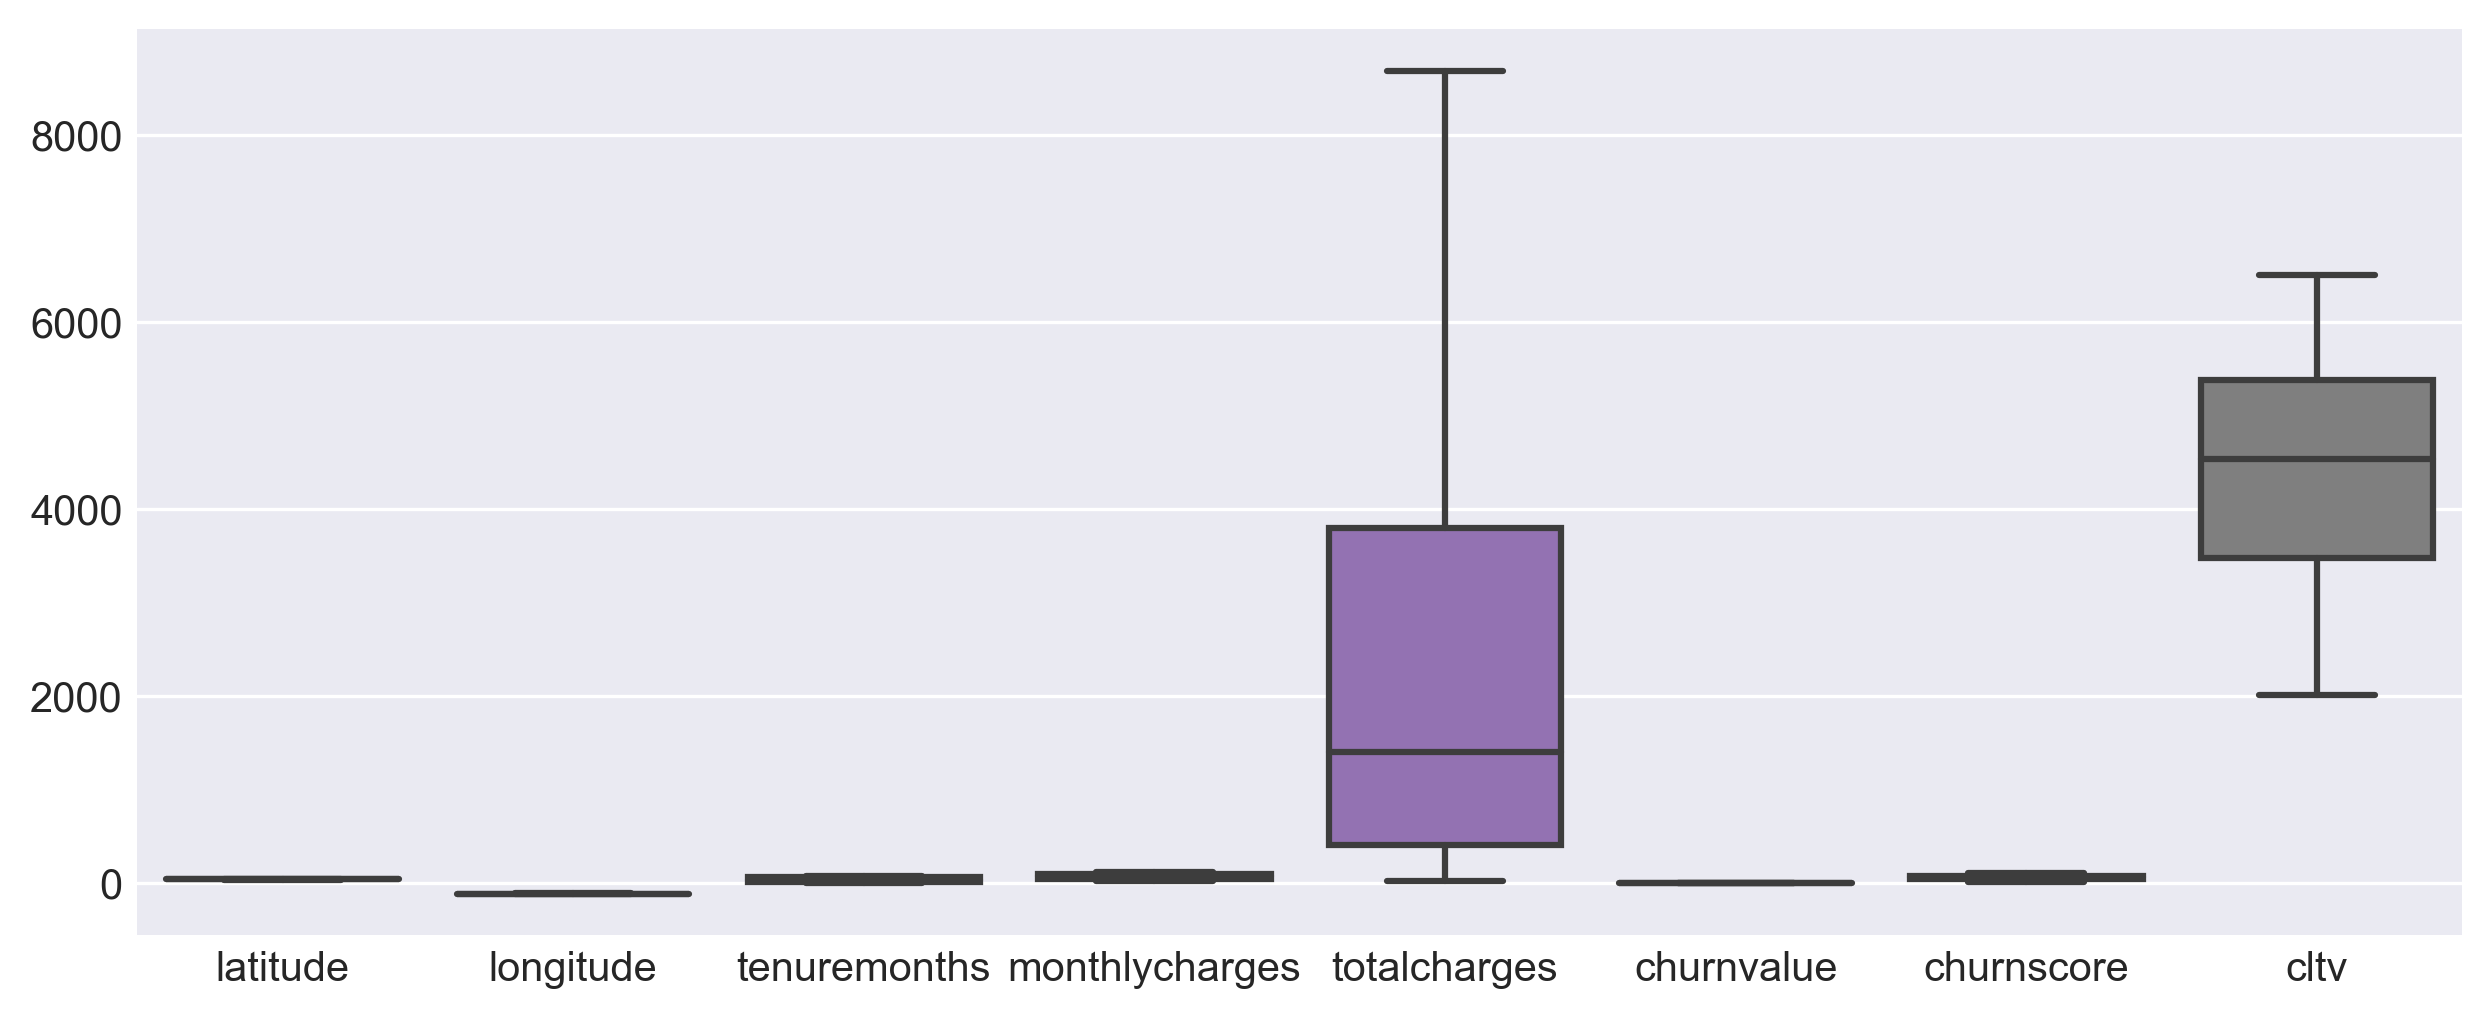

In [14]:
#we converting the total charge column to numeric and any error is convert to numpy nan (not a number)
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

plt.subplots(figsize=(10, 4), dpi=300)
sns.boxplot(data=df)
# sns.stripplot(data=df, y='totalcharges', hue='churnlabel')

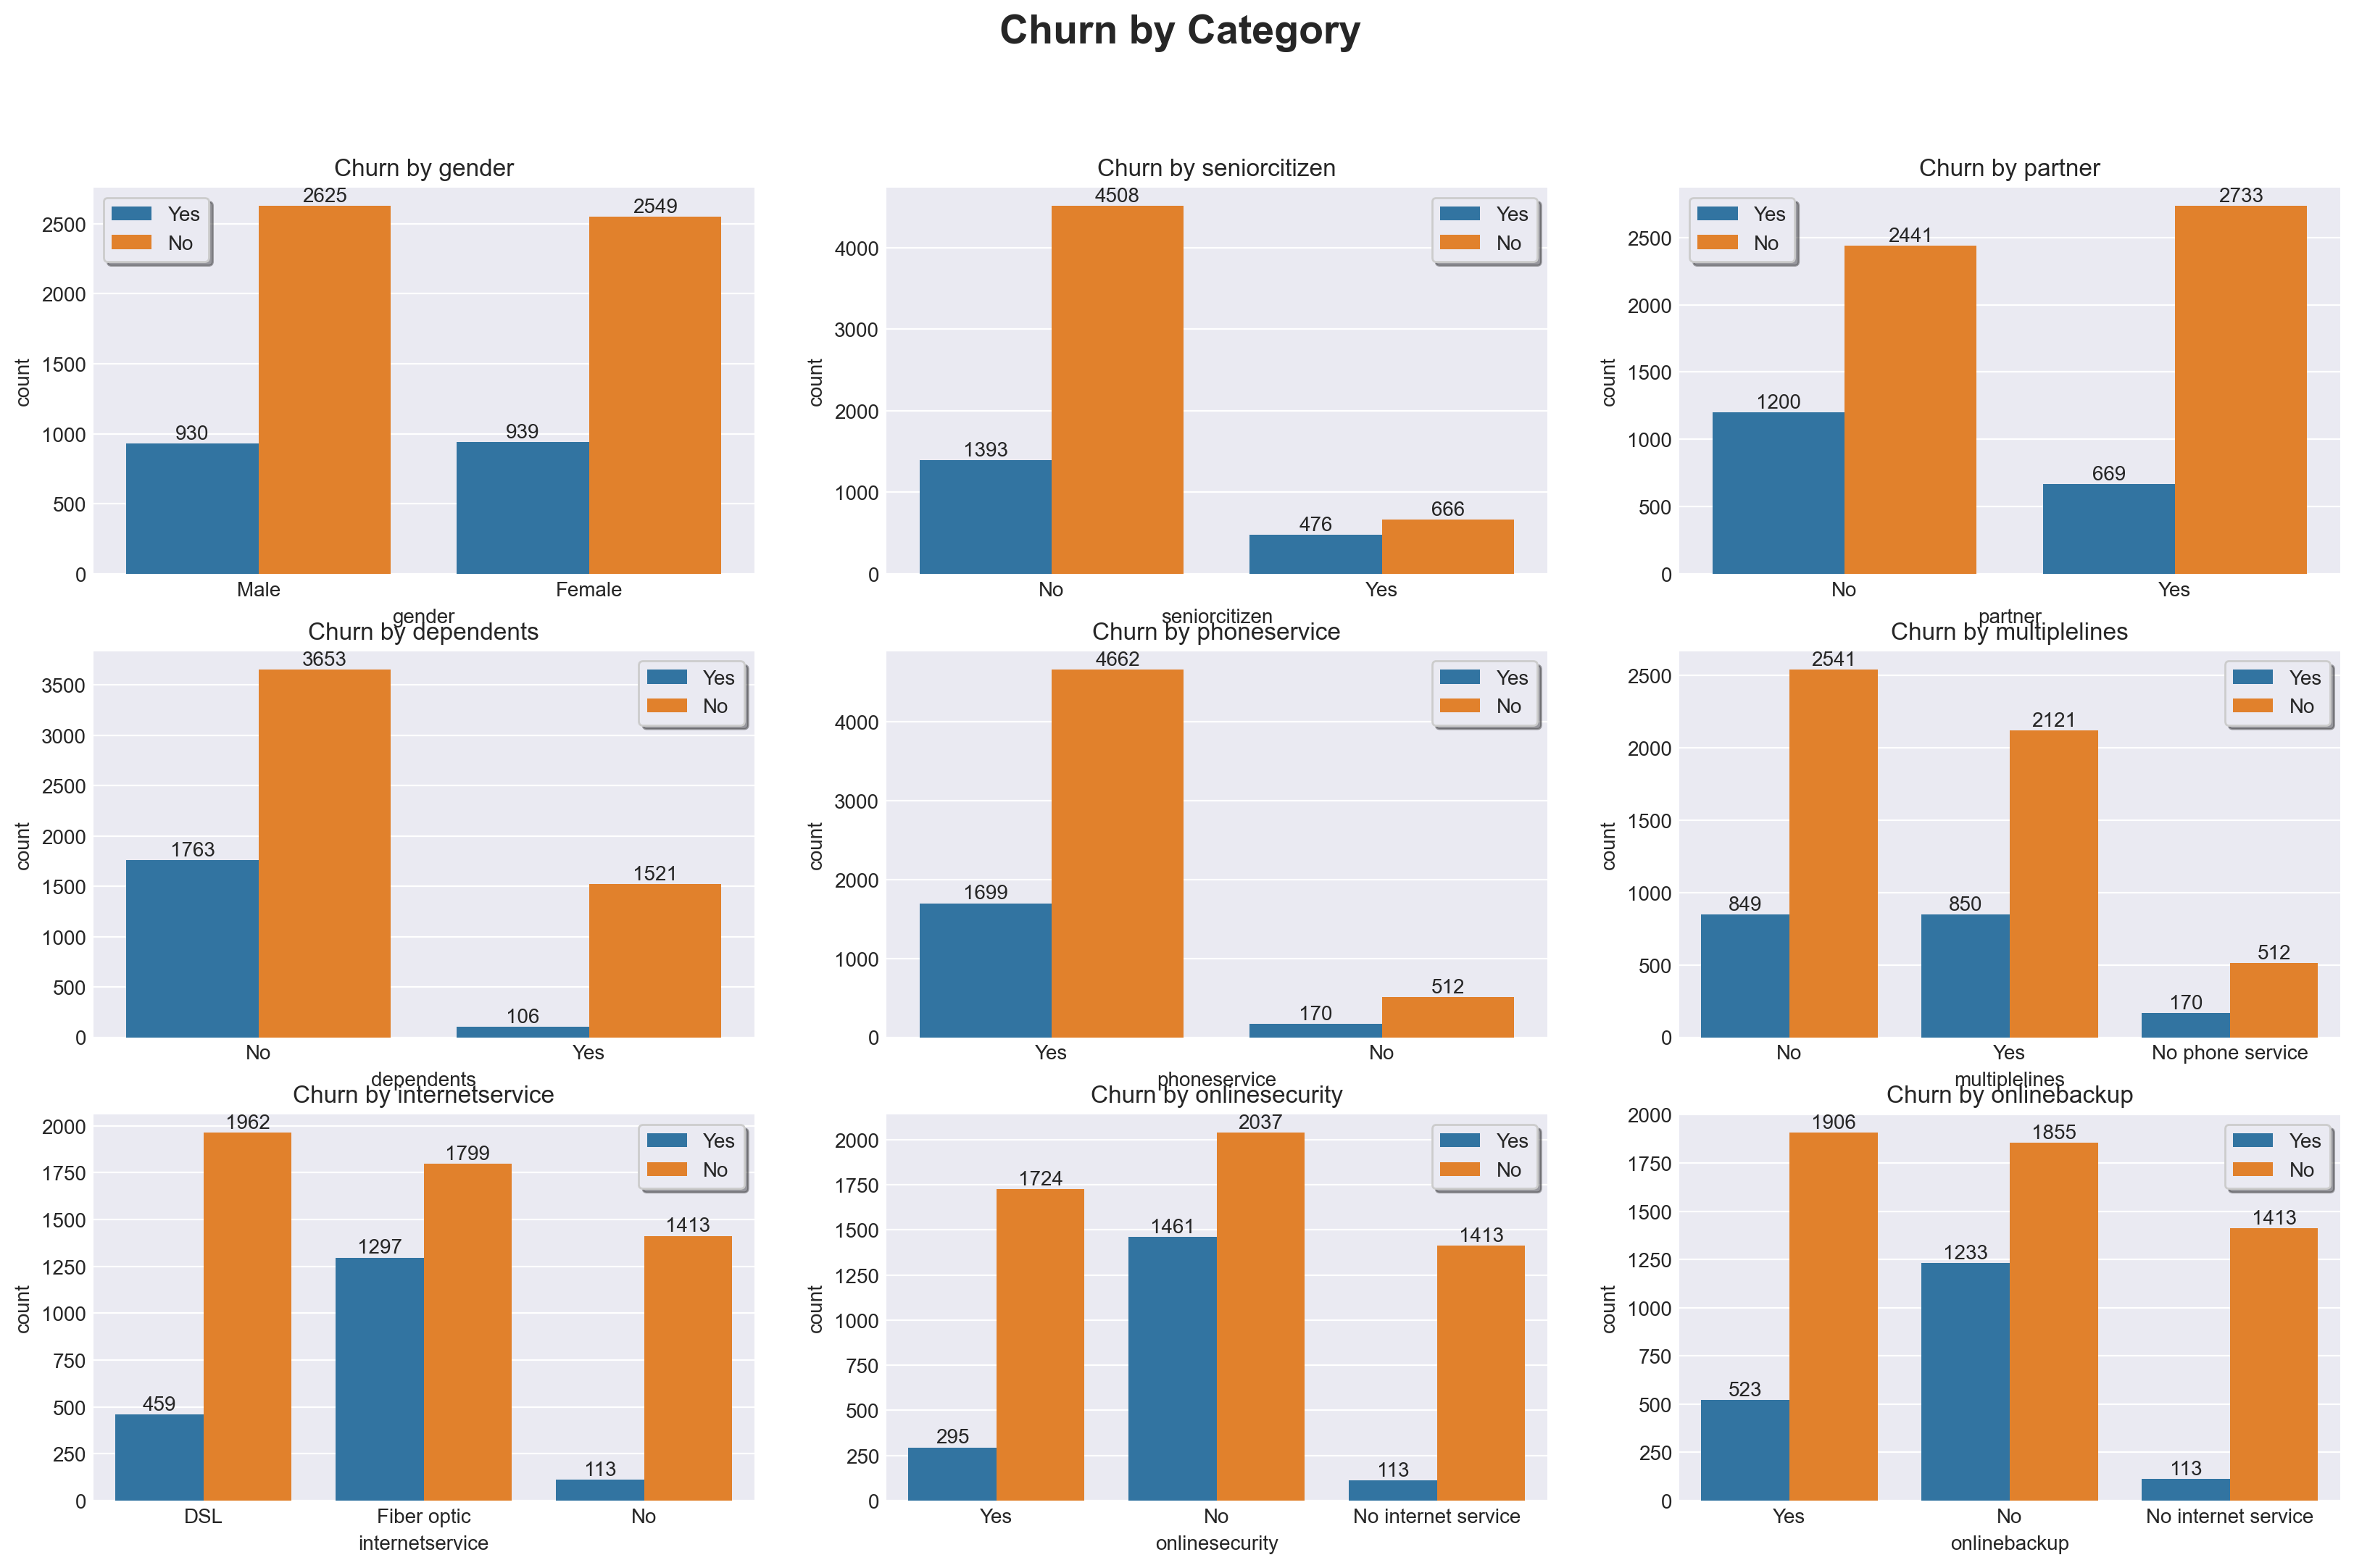

In [15]:
cat_cols = df.select_dtypes(exclude='number')

fig = plt.figure(figsize=(20, 12), dpi=200)
fig.suptitle('Churn by Category', fontsize=20, fontweight='bold')

for i, col in enumerate(cat_cols.columns[1: 10]):
    
    ax = plt.subplot((331+i), frame_on = True)
    sns.countplot(data=cat_cols, x=col, hue='churnlabel', ax=ax)
    plt.legend(frameon=True, facecolor='inherit', shadow=True)
    plt.title(f"Churn by {col}")
    
    for i in ax.containers:
        plt.bar_label(i)
    

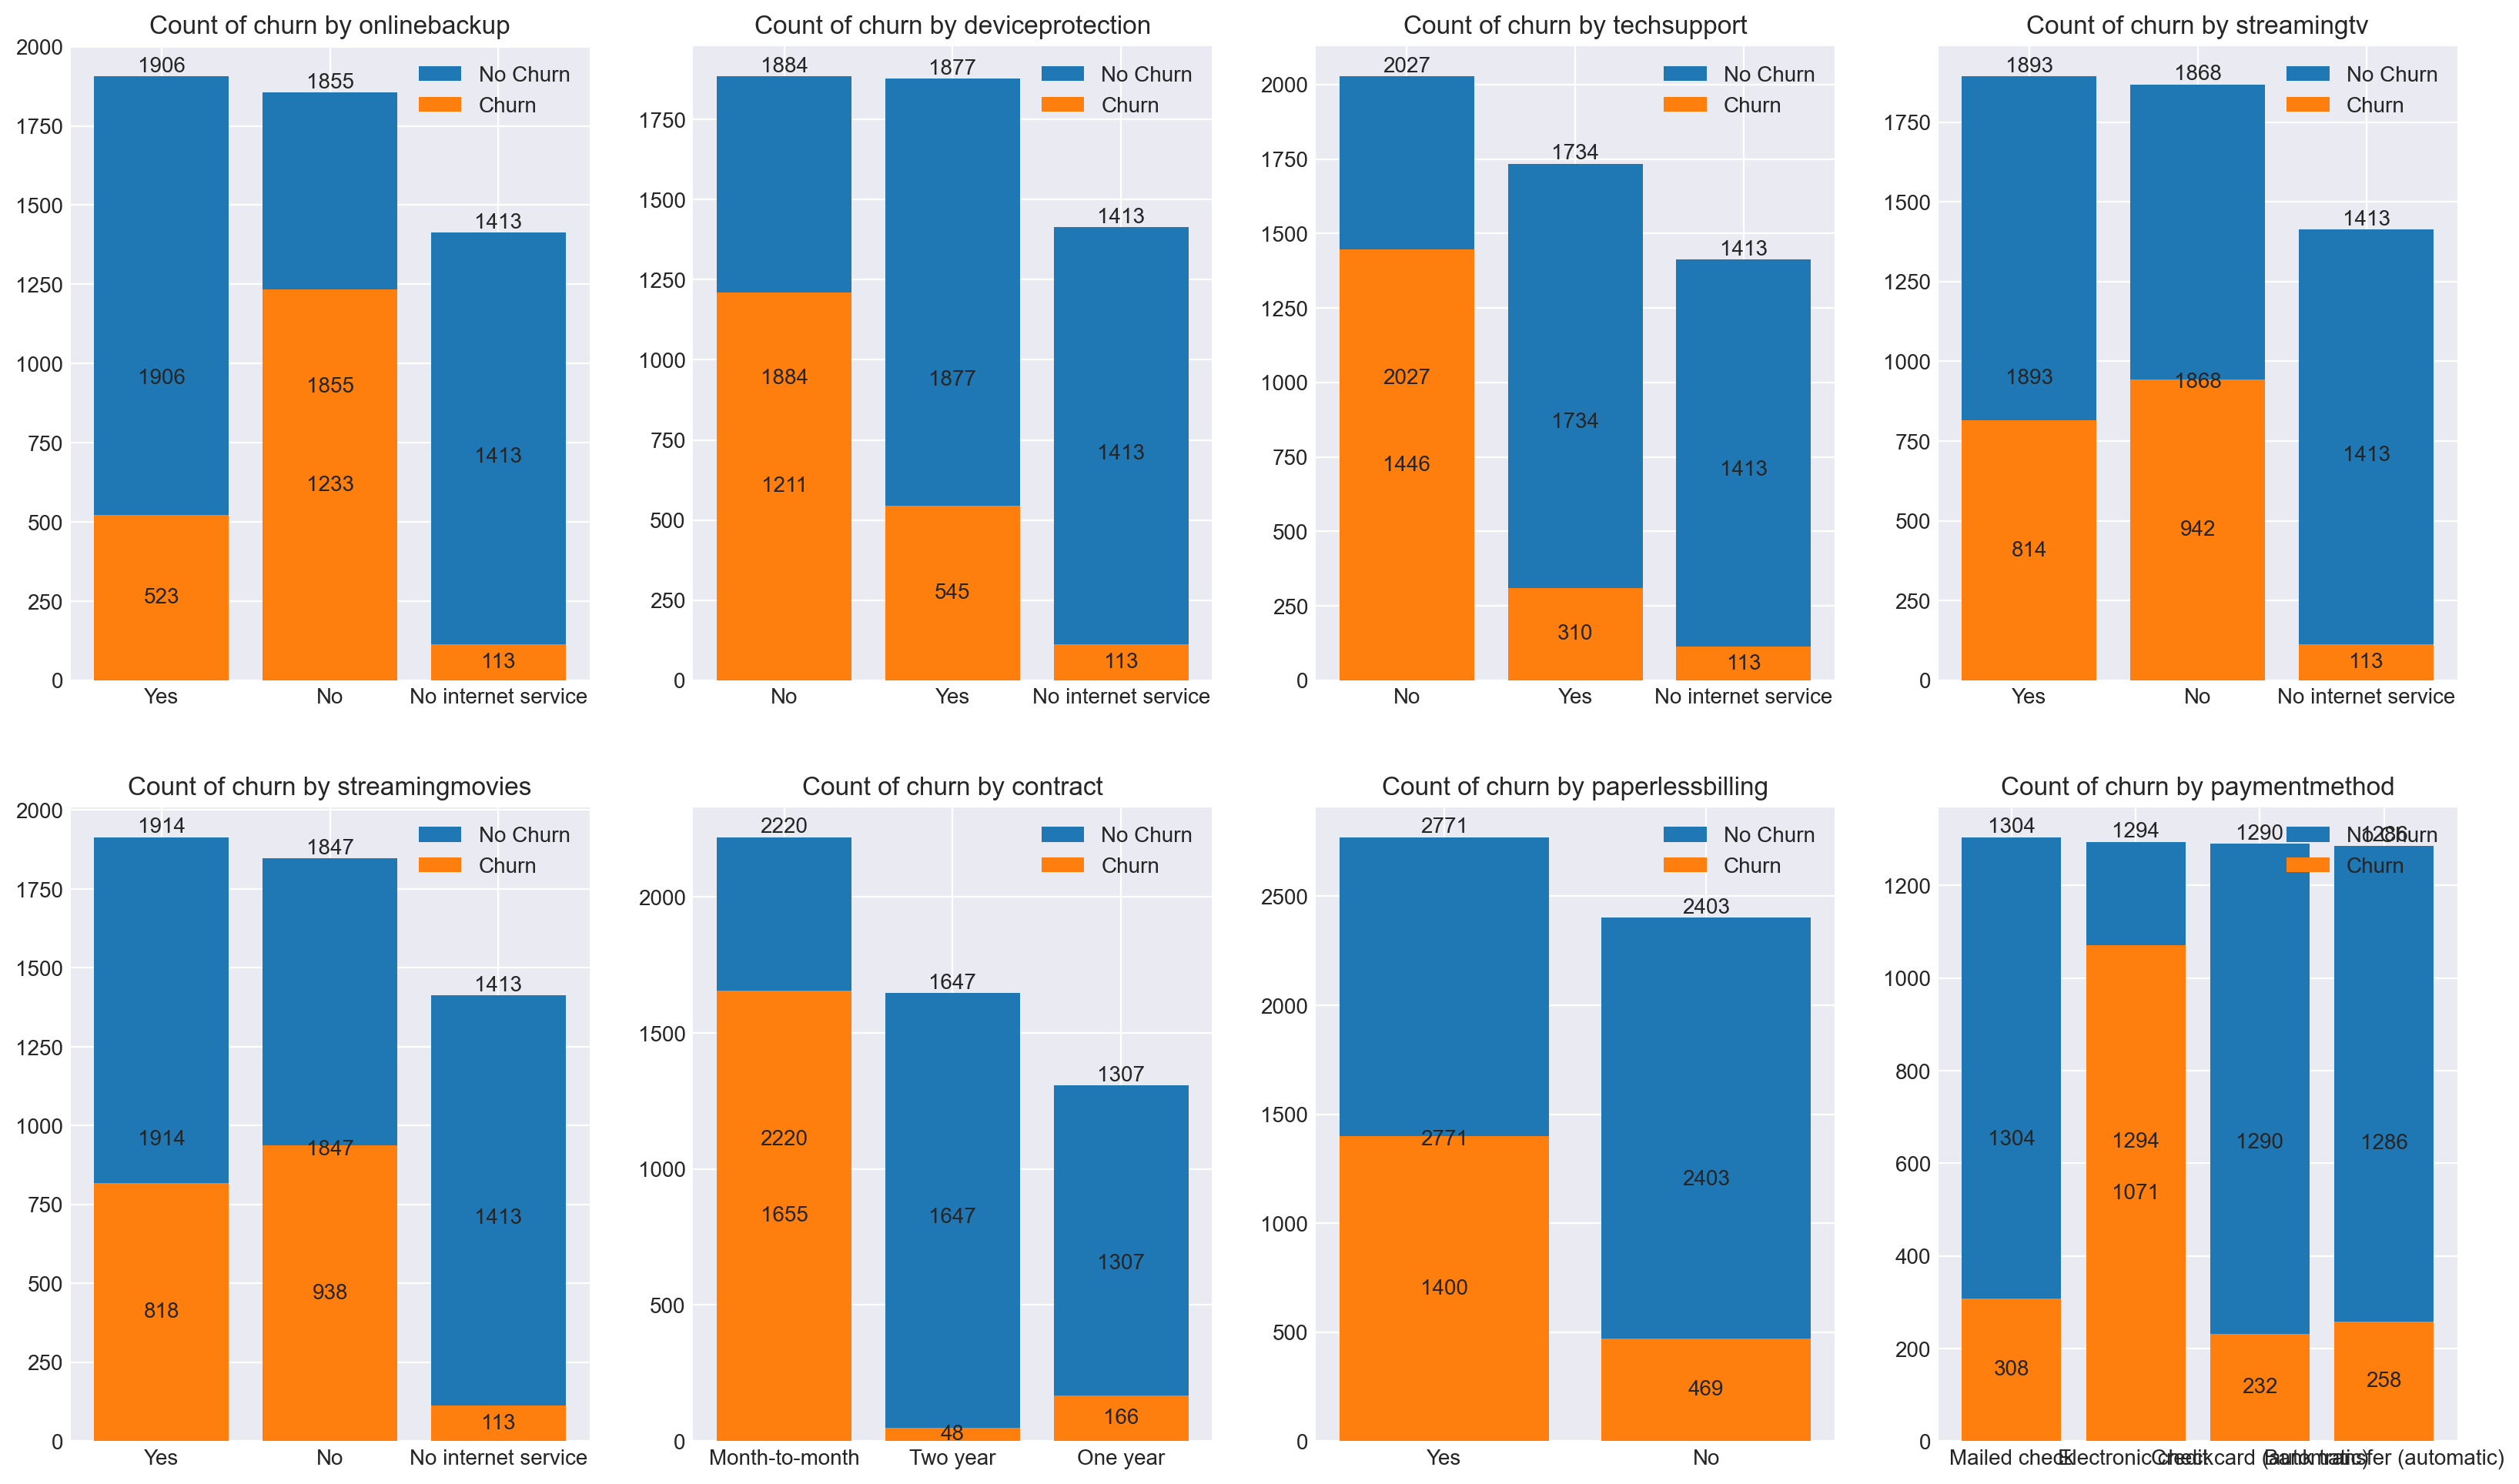

In [16]:
plt.figure(figsize=(20, 12), dpi=200)

for i, col in zip(range(241, 249), cat_cols.iloc[:, -10:-1]):
    
    data0 = df[df.churnvalue == 0][col].value_counts()
    data1 = df[df.churnvalue == 1][col].value_counts()
    
    data = pd.concat([data0, data1])
    ax = plt.subplot(i)
    p1 = ax.bar(x=data0.index, height=data0.values, label='No Churn')
    p2 = ax.bar(x=data1.index, height=data1.values, label='Churn')
#     ax.axhline(0, color='g')
    
    ax.bar_label(p1, label_type='center')
    ax.bar_label(p2, label_type='center')
    ax.bar_label(p1)
    ax.set_title(f'Count of churn by {data0.name}')
    ax.legend()


<p>Pearson correlation coefficient to determine the columns that are correlated with each so that we deal with them using PCA (Principal Component Analysis)

$r = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum({x_i - \bar{x}})^2 \sum({y_i - \bar{y}})^2}}$ <p/>

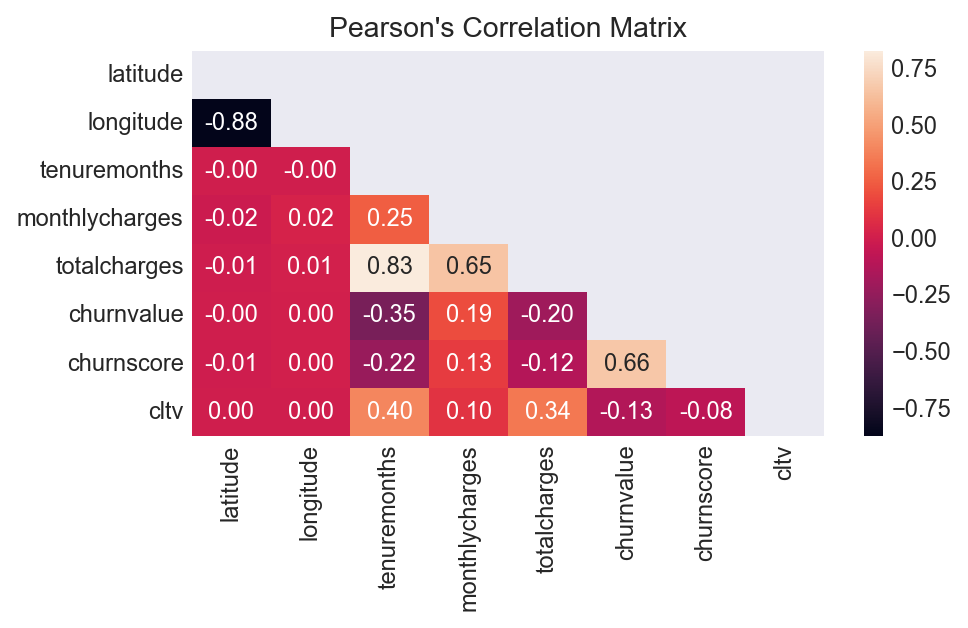

In [17]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(6, 3), dpi=170)
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', linecolor='c')
plt.title("Pearson's Correlation Matrix")
plt.show()

From the corralation matrix, total charge, monthly charge and tenure months are highly correlated with each so we will deal with them when we are doing data preprocessing. Some few other columns are also correlated with each other but we will not worry about because they will not be used in the model.

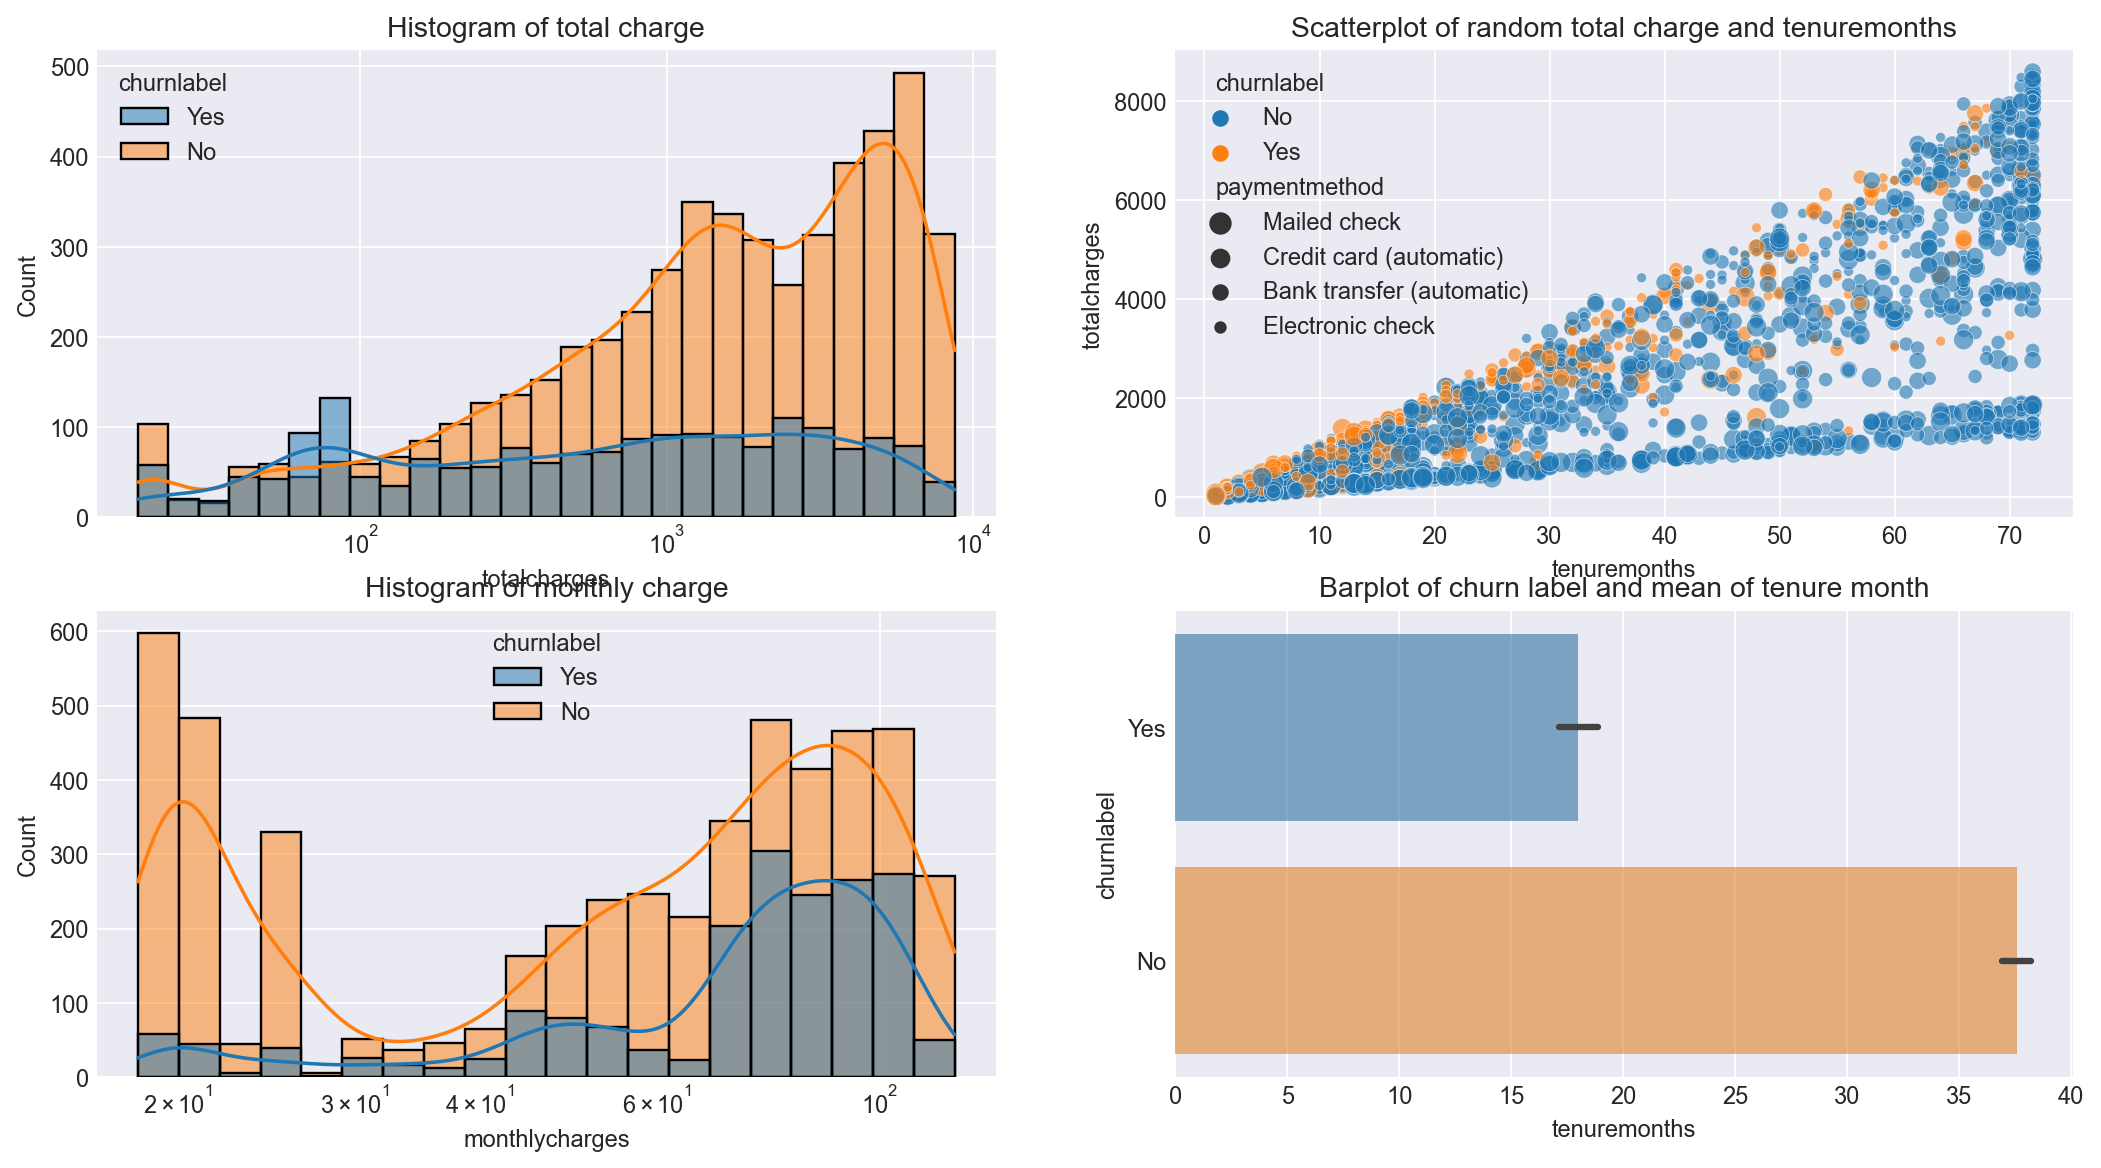

In [18]:
fig, ax = plt.subplots(2, 2, dpi=170, figsize=(15, 8))
(ax1, ax2, ax3, ax4) = ax.ravel()

sns.histplot(data=df, x='totalcharges', hue='churnlabel', kde=True, ax=ax1, log_scale=True)
ax1.set_title('Histogram of total charge')

sns.scatterplot(x='tenuremonths', y='totalcharges', data=df.sample(2000), hue='churnlabel',
                size='paymentmethod', alpha=0.6, ax=ax2)
ax2.set_title('Scatterplot of random total charge and tenuremonths')

sns.histplot(data=df, x='monthlycharges', hue='churnlabel', kde=True, ax=ax3, log_scale=True)
ax3.set_title('Histogram of monthly charge')

sns.barplot(x='tenuremonths', y='churnlabel', data=df, alpha=0.6, ax=ax4, estimator=np.mean)
ax4.set_title('Barplot of churn label and mean of tenure month')

plt.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

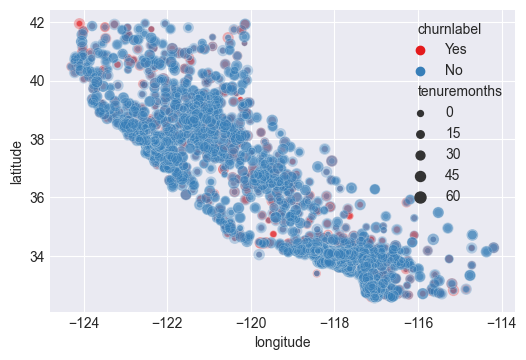

In [19]:
plt.figure(dpi=100)
sns.scatterplot(x='longitude', y='latitude', data=df, size='tenuremonths',  hue='churnlabel',
               alpha=0.3, palette='Set1')

<p>Chi Square Test to test if a categorical column has a relation with churn label
    
$\chi^{2} = \sum_{i=1}^{n} \frac{(O_i-E_i)^2}{E_i}$

In [20]:
def chi_square_test(dataframe: DataFrame):
    
    columns = cat_cols.iloc[:, 1:-2].columns
    p_value = []; dofs = []; chi_square = []
    for column in columns:
        crosstab = pd.crosstab(index=dataframe[column], columns=dataframe['churnlabel'])
        chi_value, p, dof, ev = chi2_contingency(crosstab)
        chi_square.append(chi_value)
        dofs.append(dof)
        p_value.append(p)
        
    return pd.DataFrame({
        'column': columns,
        'test_statistic': np.round(chi_square),
        'degree_of_freedom' : dof,
        'p_value': np.round(p_value, 2)
    })

In [21]:
chi_table = chi_square_test(df)
chi_table['Decision'] = np.where(chi_table.p_value < 0.05, 'significant', 'not significant')
chi_table

column  test_statistic  degree_of_freedom  p_value  \
0             gender             0.0                  3     0.49   
1      seniorcitizen           159.0                  3     0.00   
2            partner           159.0                  3     0.00   
3         dependents           434.0                  3     0.00   
4       phoneservice             1.0                  3     0.34   
5      multiplelines            11.0                  3     0.00   
6    internetservice           732.0                  3     0.00   
7     onlinesecurity           850.0                  3     0.00   
8       onlinebackup           602.0                  3     0.00   
9   deviceprotection           558.0                  3     0.00   
10       techsupport           828.0                  3     0.00   
11       streamingtv           374.0                  3     0.00   
12   streamingmovies           376.0                  3     0.00   
13          contract          1185.0                  3     0.00   
14  paperlessbilling           258.0                  3     0.00   
15     paymentmethod           648.0                  3     0.00   

           Decision  
0   not significant  
1       significant  
2       significant  
3       significant  
4   not significant  
5       significant  
6       significant  
7       significant  
8       significant  
9       significant  
10      significant  
11      significant  
12      significant  
13      significant  
14      significant  
15      significant

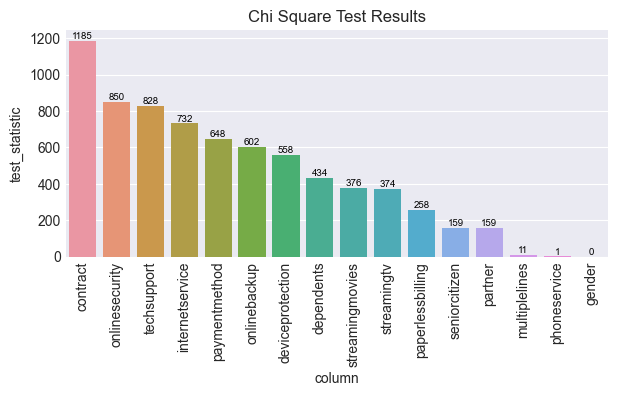

In [22]:
test_results = chi_square_test(df)

fig, ax = plt.subplots(dpi=100, figsize=(7, 3))

sns.barplot(x='column', y='test_statistic', data=test_results.sort_values('test_statistic', ascending=False), ax=ax)
ax.xaxis.set_tick_params(rotation=90)
ax.set_title('Chi Square Test Results')
for i in ax.containers:
    ax.bar_label(i, fontsize=7, color='k')
plt.show()

In [23]:
pd.crosstab(index=df['gender'], columns=df['churnlabel']).iloc[:, ::-1]

churnlabel  Yes    No
gender               
Female      939  2549
Male        930  2625

Finding a dealing with missing values (np.nan or NAN)

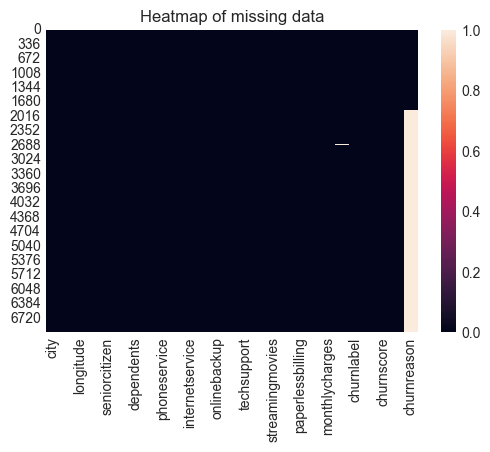

In [24]:
plt.subplots(dpi=100)
sns.heatmap(df.isnull())
plt.title('Heatmap of missing data')
plt.show()

## Modelling

In [25]:
def normality_test(x) -> None:
    statistic, pvalue = normaltest(x)
    if pvalue < 0.05:
        print(f'Data is not normal because pvalue = {pvalue}')
    else:
        print(f'Data is normal because pvalue = {pvalue}')
        
normality_test(df.monthlycharges)

Data is not normal because pvalue = 0.0


### Splitting the data into training and testing set

*20% of the data for testing and 80% for training*

In [26]:
X = df.drop(
    [
    'city', 'latitude', 'longitude', 'churnreason', 'cltv', 'churnscore', 'churnvalue', 'churnlabel'
    ], axis=1).copy()

y = df.churnlabel.copy()

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

In [27]:
# Encoding the target (churn label) into numeric
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

#### Initializing the models with some starting arguments

In [28]:
logit = LogisticRegression()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
svm = SVC(probability=True)
dtree = DecisionTreeClassifier()
smote = SMOTE()

#### We are putting all our data preprocessing steps including imputing the missing values, scaling the data, performing PCA on the highly correlated columns in a pipeline. Also, we are using smote to resample the data in order to reduce the class imbalance effect. The models are also included in the pipeline.

In [29]:
logit_pip_num_col = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('normal_transformer', QuantileTransformer(output_distribution='normal')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.98))
]);


logit_pip_cat_col = Pipeline([
    ('one_hot', OneHotEncoder())
]);


transformer = ColumnTransformer([
    ('numb_columns', logit_pip_num_col, ['monthlycharges', 'totalcharges', 'tenuremonths']),
    ('cat_columns', logit_pip_cat_col, [col for col in x_train.columns if col not in ['monthlycharges', 'totalcharges', 'tenuremonths']]) 
], remainder='passthrough')

# Logistics Regression Pipeline
logit_pip_combine = Pipeline([
    ('transform', transformer),
    ('resampling', smote),
#     ('rfe', RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=0.9)),
    ('logit', logit)
])

# KNearestNeighbor Pipeline
knn_pip_combined = Pipeline([
    ('transform', transformer),
    ('resampling', smote),
#     ('rfe', RFE(estimator=RandomForestClassifier(), n_features_to_select=0.9)),
    ('knn', knn)
])


# Random Forest Classifier Pipeline
rfc_pip_combined = Pipeline([
    ('transform', transformer),
    ('resampling', smote),
#     ('rfe', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=0.9)),
    ('rfc', rfc)
])


# Support Vector Classifier Pipeline
svm_pip_combined = Pipeline([
    ('transform', transformer),
    ('resampling', smote),
#     ('rfe', RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=0.9)),
    ('svc', svm)
])


dt_pip_combined = Pipeline([
    ('transform', transformer),
    ('resampling', smote),
#     ('rfe', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=0.9)),
    ('dt', dtree)
])

Cross validation

In [30]:
def cross_results(model):
    return cross_val_score(model, x_train, y_train, cv=3, scoring='recall').mean()

In [31]:
logit_score = cross_results(logit_pip_combine)
knn_score = cross_results(knn_pip_combined)
rfc_score = cross_results(rfc_pip_combined)
svm_score = cross_results(svm_pip_combined)
dt_score = cross_results(dt_pip_combined)

In [32]:
logit_score, knn_score, rfc_score, svm_score, dt_score

(0.8073711009703476,
 0.7518423728313387,
 0.590631061319426,
 0.7625532188875743,
 0.5692093692069548)

<body>
<h2> Classification Matrics <h2/>
<ul>
    <li> $accuracy = \frac{TP + TN} {TP + FP + FN + TN}$   
    <li>$precision = \frac{TP} {TP + FP}$   
    <li>$recall = \frac{TP} {TP + FN}$   
    <li>$f1 score = 2 * \frac{precision * { recall}} {precision + recall}$
<ul/>
<body/>

In [33]:
def summary_report(models, x, y_true):
    
    summary = np.zeros((len(models), 5))
    
    for i, model in enumerate(models):
        y_pred = model.predict(x)
        score = accuracy_score(y_true, y_pred)
        loss = log_loss(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        summary[i, :] = (score, loss, precision, recall, f1)
        
    return pd.DataFrame(summary,
                        columns=['accuracy', 'loss', 'precision', 'recall', 'f1'],
                        index=['logit', 'knn', 'rfc', 'svm', 'dtree']
                       )

In [34]:
logit_pip_combine.fit(x_train, y_train)
knn_pip_combined.fit(x_train, y_train)
rfc_pip_combined.fit(x_train, y_train)
svm_pip_combined.fit(x_train, y_train)
dt_pip_combined.fit(x_train, y_train)

print('Fitted successfully')

Fitted successfully


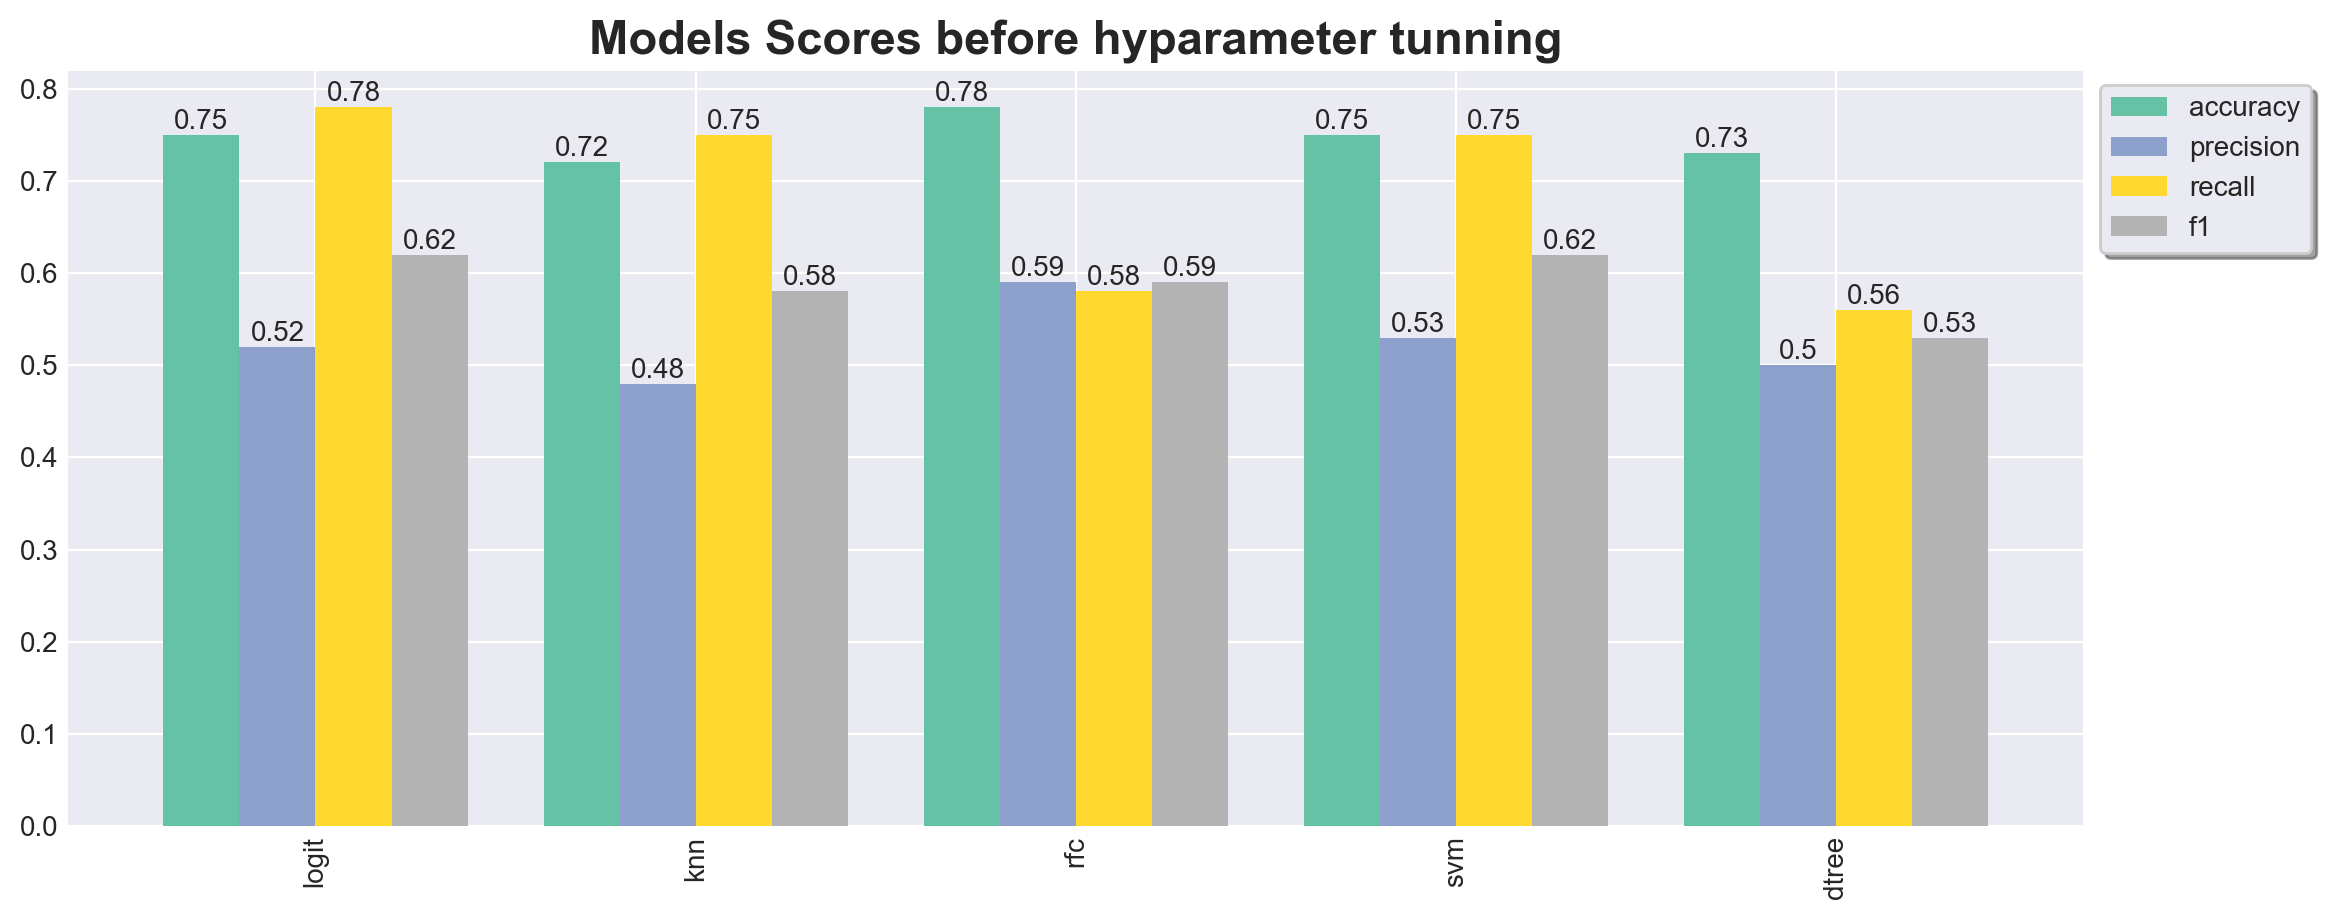

In [35]:
report = summary_report([
    logit_pip_combine, knn_pip_combined, rfc_pip_combined, svm_pip_combined, dt_pip_combined
], x_test, y_test).round(2)

fig, ax = plt.subplots(figsize=(13, 5), dpi=200)
bar = report.drop('loss', axis=1).plot(kind='bar', ax=ax, width=0.8, cmap='Set2')
ax.set_title('Models Scores before hyparameter tunning', fontsize=17, fontweight='bold')
ax.legend(loc='best', bbox_to_anchor=(0.12, 0.5, 1, 0.5), frameon=True, shadow=True, facecolor='inherit')
for i in bar.containers:
    plt.bar_label(i)

In [36]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

### Hyperparameters tuning using RandomizedSearchCv

In [37]:
LogisticRegression()

LogisticRegression()

In [38]:
logit_params = {
    'logit__penalty': ['l1', 'l2'],
    'logit__C' : np.linspace(1, 10, 10),
    'logit__solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg'],
#     'logit__l1_ratio': np.linspace(0, 1, 5),
#     'logit__class_weight': [None, 'balanced'],
    'transform__cat_columns__one_hot__drop' : ['first', 'if_binary', None]
}

knn_params = {
    'knn__n_neighbors' : np.arange(5, 25, 5),
    'knn__weights' : ['uniform', 'distance'],
    'knn__p': [1, 2],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'transform__cat_columns__one_hot__drop' : ['first', 'if_binary', None],
#     'transform__numb_columns__pca__n_components' : [1, 0.98]
}

rfc_params = {
    'rfc__max_depth' : [None, *np.arange(3, 15, 3)],
    'rfc__max_features' : [None, "sqrt", "log2"],
    'rfc__criterion': ['gini', 'entropy'],
    'rfc__class_weight': [None, 'balanced', 'balanced_subsample'],
#     'rfc__ccp_alpha' : [0, *np.random.choice(ccp_paths, 10)],
    'transform__cat_columns__one_hot__drop' : ['first', 'if_binary', None],
#     'transform__numb_columns__pca__n_components' : [1, 0.98]
}

svc_params = {
    'svc__C' : np.linspace(1, 10, 10),
    'svc__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__gamma' : ['scale', 'auto'],
#     'svc__class_weight': [None, 'balanced'],
    'transform__cat_columns__one_hot__drop' : ['first', 'if_binary', None],
#     'transform__numb_columns__pca__n_components' : [1, 0.98]
}

dtree_params = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth' : [None, *np.arange(3, 15, 3)],
    'dt__min_samples_split': np.arange(2, 6),
    'dt__max_features' : [None, "sqrt", "log2"],
#     'dt__class_weight': [None, 'balanced'],
#     'dt__ccp_alpha' : [0, *np.random.choice(ccp_paths, 11)],
    'transform__cat_columns__one_hot__drop' : ['first', 'if_binary', None],
#     'transform__numb_columns__pca__n_components' : [1, 0.98]
}

In [39]:
param_search_logit = RandomizedSearchCV(logit_pip_combine, logit_params, scoring='recall',
                             cv=5, n_jobs=-1, n_iter=20, refit=True)

param_search_knn = RandomizedSearchCV(knn_pip_combined, knn_params, scoring='recall',
                             cv=5, n_jobs=-1, n_iter=10)

param_search_rfc = RandomizedSearchCV(rfc_pip_combined, rfc_params, scoring='recall',
                             cv=5, n_jobs=-1, n_iter=15)

param_search_svc = RandomizedSearchCV(svm_pip_combined, svc_params, scoring='recall',
                             cv=5, n_jobs=-1, n_iter=10)

param_search_dt = RandomizedSearchCV(dt_pip_combined, dtree_params, scoring='recall',
                             cv=5, n_jobs=-1, n_iter=15)

In [40]:
param_search_logit.fit(x_train, y_train)
print('Logit fitted successfully')

param_search_knn.fit(x_train, y_train)
print('KNN fitted successfully')

param_search_rfc.fit(x_train, y_train)
print('RFC fitted successfully')

param_search_svc.fit(x_train, y_train)
print('SVC fitted successfully')

param_search_dt.fit(x_train, y_train)
print('Dtree fitted successfully')

Logit fitted successfully
KNN fitted successfully
RFC fitted successfully
SVC fitted successfully
Dtree fitted successfully


In [132]:
# pd.concat([pd.DataFrame(param_search_logit.cv_results_['params']), pd.DataFrame(param_search_logit.cv_results_['mean_test_score'])], axis=1)

In [47]:
refined_logit = param_search_logit.best_estimator_
refined_knn = param_search_knn.best_estimator_
refined_rfc = param_search_rfc.best_estimator_
refined_svc = param_search_svc.best_estimator_
refined_dt = param_search_dt.best_estimator_

In [ ]:
best_params_logit = param_search_logit.best_params_
best_params_knn = param_search_knn.best_params_
best_params_rfc = param_search_rfc.best_params_
best_params_svc = param_search_svc.best_params_
best_params_dt = param_search_dt.best_params_

In [79]:
import json

all_best_params = [best_params_logit, best_params_knn, best_params_rfc, best_params_svc, best_params_dt]

best_parameters = [
    {k : (int(v) if isinstance(v, np.int32) else v) for k, v in dict_object.items()} for dict_object         in all_best_params
]

with open('best_params.json', 'w') as fp:
    json.dump(best_parameters, fp, indent=4)

In [49]:
refined_logit.fit(x_train, y_train)
refined_knn.fit(x_train, y_train)
refined_rfc.fit(x_train, y_train)
refined_svc.fit(x_train, y_train)
refined_dt.fit(x_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numb_columns',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('normal_transformer',
                                                                   QuantileTransformer(output_distribution='normal')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.98))]),
                                                  ['monthlycharges',
                                                   'totalcharges',
                                                   'tenuremonths']),
                                                 ('ca...
                                                                   OneHotEncoder())]),
                                                  ['gender', 'seniorcitizen',
                                                   'partner', 'dependents',
                                                   'phoneservice',
                                                   'multiplelines',
                                                   'internetservice',
                                                   'onlinesecurity',
                                                   'onlinebackup',
                                                   'deviceprotection',
                                                   'techsupport', 'streamingtv',
                                                   'streamingmovies',
                                                   'contract',
                                                   'paperlessbilling',
                                                   'paymentmethod'])])),
                ('resampling', SMOTE()),
                ('dt',
                 DecisionTreeClassifier(max_depth=3, max_features='sqrt'))])

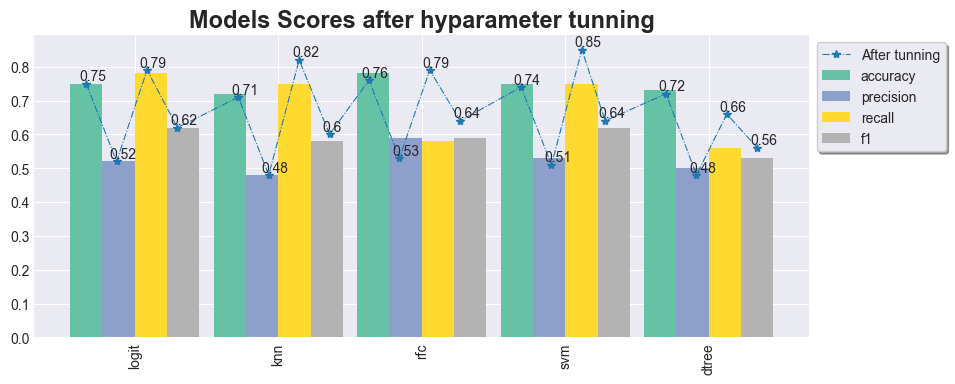

In [50]:
keys = np.linspace(-0.65, 4.65, 26)

index = []
for i in keys:
    if i <= 1.47:
        index.append(i+0.1)
    elif i <= 3.378:
        index.append(i-0.05)
    else:
        index.append(i-0.1)
        
index = np.delete(np.array(index), np.arange(0, 26, 5))

report1 = summary_report([refined_logit, refined_knn, refined_rfc, refined_svc, refined_dt], x_test, y_test).round(2)

fig, ax = plt.subplots(figsize=(10, 4), dpi=100)
bar = report.drop('loss', axis=1).plot(kind='bar', ax=ax, width=0.9, cmap='Set2')
line1 = plt.plot(index, report1.drop('loss', axis=1).values.ravel(), lw=0.8, marker='*', 
                 linestyle='-.', label='After tunning')
ax.set_title('Models Scores after hyparameter tunning', fontsize=17, fontweight='bold')
legend = ax.legend(loc='best', bbox_to_anchor=(0.185, 0.5, 1, 0.5), shadow=True, frameon=True, facecolor='inherit')
# for i in bar.containers:
#     plt.bar_label(i, fontsize=12)
for k, v in zip(index, report1.drop('loss', axis=1).values.ravel()):
    ax.text(k-0.05, v+0.01, str(v))

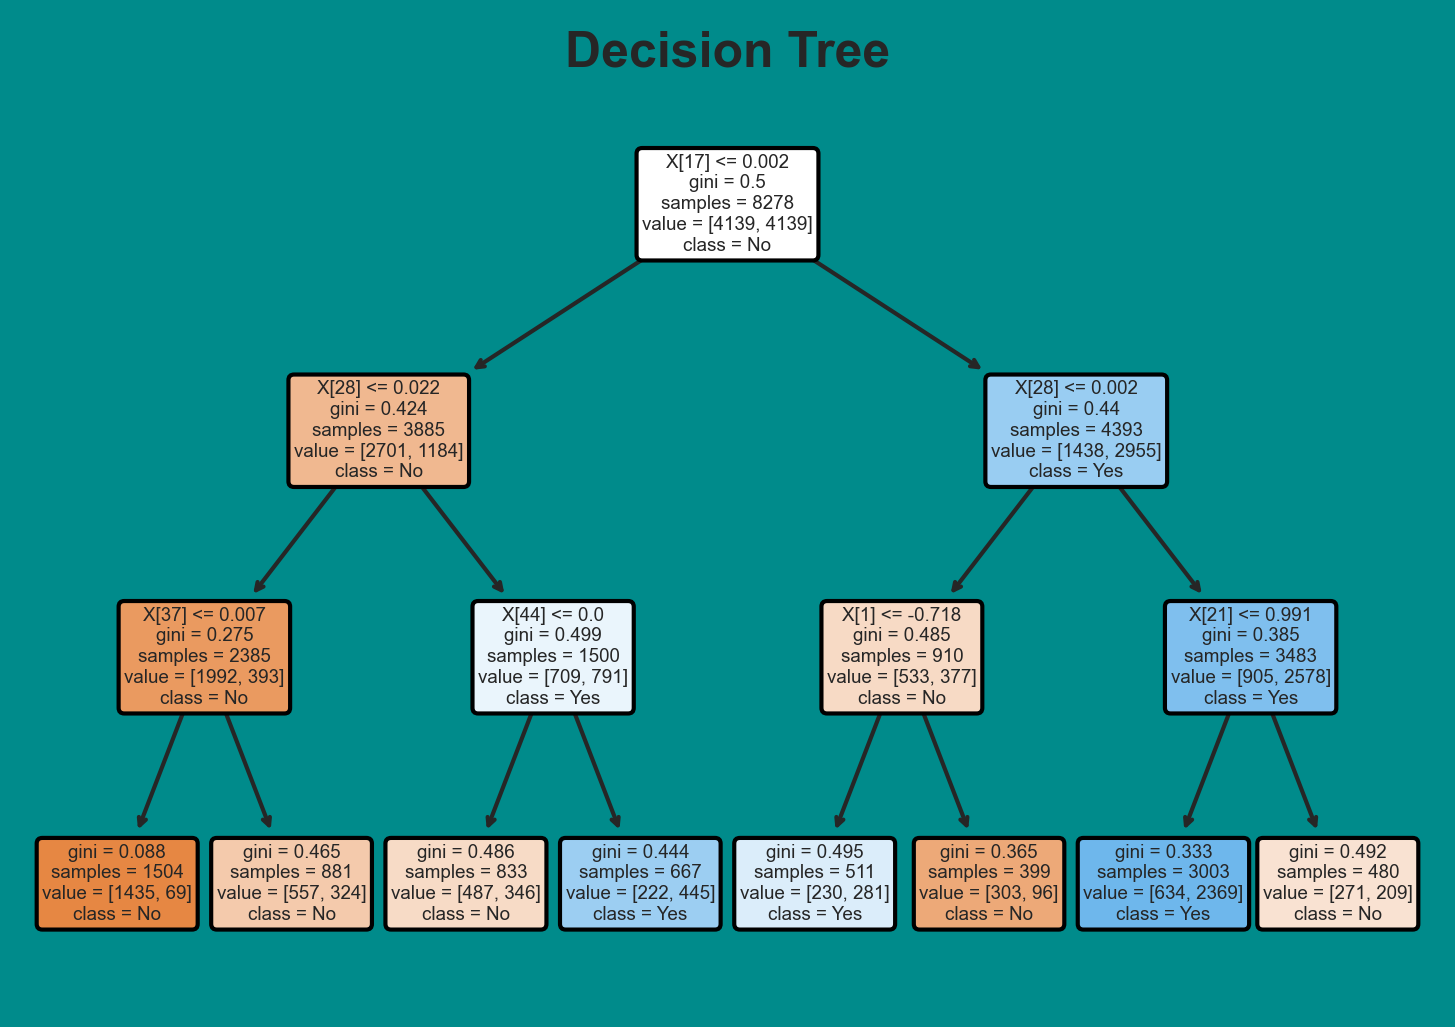

In [51]:
plt.figure(dpi=300, facecolor='darkcyan')
ax = plt.subplot()
plot_tree(refined_dt['dt'], 
          filled=True, rounded=True, class_names=label_encoder.classes_, ax=ax, fontsize=4.5)
ax.set_title('Decision Tree', fontdict=dict(size=12, weight='bold'))
plt.show()

## Predictions

In [52]:
y_pred_logit = refined_logit.predict(x_test)
y_pred_knn = refined_knn.predict(x_test)
y_pred_rfc = refined_rfc.predict(x_test)
y_pred_svc = refined_svc.predict(x_test)
y_pred_dt = refined_dt.predict(x_test)

In [64]:
def plot_confusion(y_true, y_pred):
    cm1:np.array = confusion_matrix(y_true, y_pred)
    cm_norm = confusion_matrix(y_true, y_pred, normalize='true')
    labels = np.array([f"{i} \n ({k:.1%})" for i, k in zip(cm1.flatten(),                            cm_norm.flatten())]).reshape((2,2))
    sns.heatmap(cm1, annot=labels, fmt='', xticklabels=['No', 'Yes'],yticklabels=['No', 'Yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

In [187]:
np.unique(y_test, return_counts=True)

(array(['No', 'Yes'], dtype=object), array([1035,  374], dtype=int64))

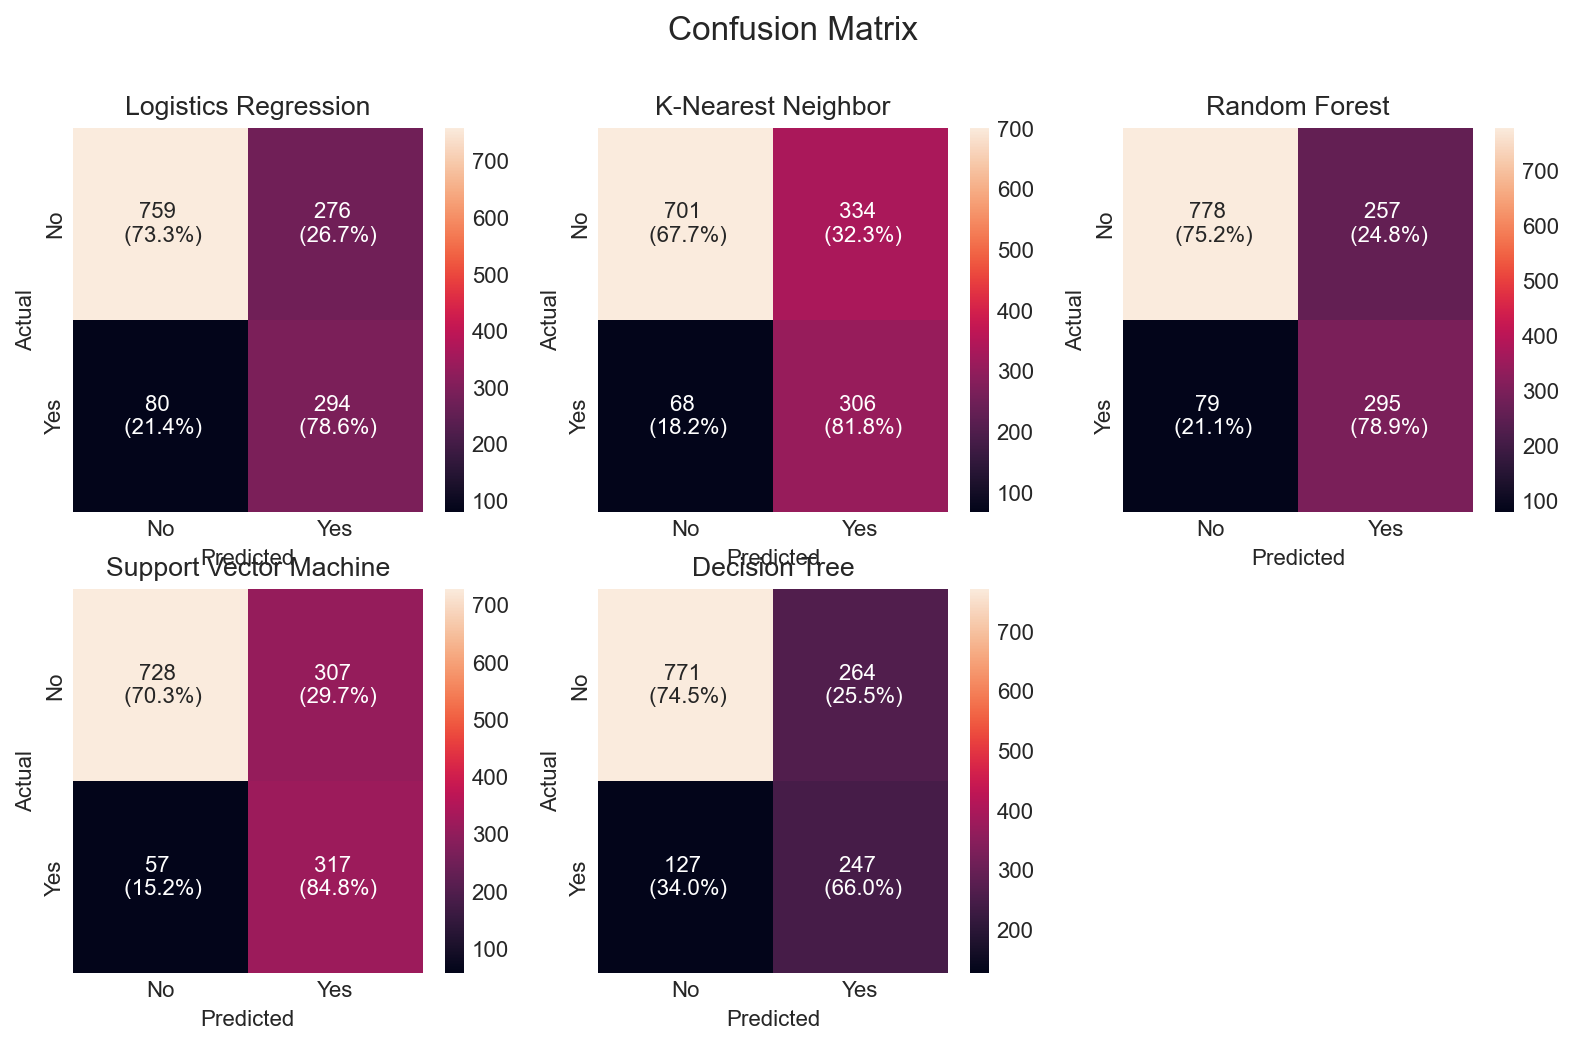

In [66]:
fig = plt.figure(figsize=(12, 7), dpi=160)
fig.suptitle('Confusion Matrix', fontsize=15)

ax1 = plt.subplot(231)
plot_confusion(y_test, y_pred_logit)
ax1.set_title('Logistics Regression')

ax2 = plt.subplot(232)
plot_confusion(y_test, y_pred_knn)
ax2.set_title('K-Nearest Neighbor')


ax3 =plt.subplot(233)
plot_confusion(y_test, y_pred_rfc)
ax3.set_title('Random Forest')

ax4 = plt.subplot(234)
plot_confusion(y_test, y_pred_svc)
ax4.set_title('Support Vector Machine')

ax5 = plt.subplot(235)
plot_confusion(y_test, y_pred_dt)
ax5.set_title('Decision Tree')
plt.show()

**From the confusion matrix, Support Vector Machine is the best algorithm overall**
* SVM has scored a recall (true positive rate, sensitivity or hit rate) of 84.8% ($\frac{317} {317+57}$). This means, out of the total of 374 people who left the company, 317 of them were correctly predicted by SVM. It has a specificity (or true negative rate) of 70.3% ($\frac{728} {728+307}$). Also, it scored a false positive rate (The probability of giving a false alarm that a customer will leave even though they will not) of 29.7% ($\frac{307} {307+728}$).However, we will not worry about the false positive because it will make the company cautious about its customers. Lastly, it has a false negative of 15.2%. This means the probability of the model missing a true positive is 15.2%. This our concern and this is why we used recall to evaluate our models. "The cost of generating customers is higher than the cost of retaining customers." 

* ROC: Receiver Operator Characteristics.  
* AUC: Area Under the Curve

In [70]:
def make_roc_auc_plot(estimator, y_true, x_test):
    
    model = estimator.get_params(deep=False).get('steps')[-1][0]
    pred_proba = estimator.predict_proba(x_test)[:, -1]
    auc = roc_auc_score(y_true, pred_proba)
    fpr, tpr, threshold = roc_curve(y_true, pred_proba)
    sns.lineplot(x=fpr, y=tpr, label=f"{model} = {auc:.2f}", legend=True, linestyle='-', lw=0.5)
    plt.plot((min(fpr), max(fpr)), (min(tpr), max(tpr)), lw=0.7)
    plt.fill_between(fpr, tpr, alpha=0.05)

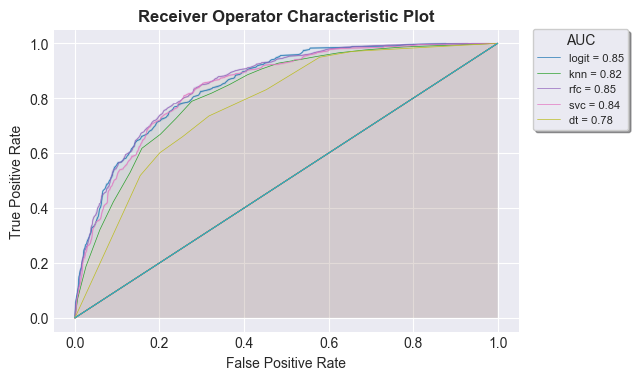

In [71]:
fig, ax = plt.subplots(dpi=100)

make_roc_auc_plot(refined_logit, y_test, x_test)
make_roc_auc_plot(refined_knn, y_test, x_test)
make_roc_auc_plot(refined_rfc, y_test, x_test)
make_roc_auc_plot(refined_svc, y_test, x_test)
make_roc_auc_plot(refined_dt, y_test, x_test)

ax.legend(loc = 'best', title = 'AUC', bbox_to_anchor=(0.747, 0.2, 0.5, 0.82), frameon=True, shadow=True, facecolor='inherit', fontsize=8)
ax.set_title('Receiver Operator Characteristic Plot', fontdict={'fontsize':12, 'fontweight': 'bold'})
ax.yaxis.set_label_text('True Positive Rate')
ax.xaxis.set_label_text('False Positive Rate')
plt.show()

In [72]:
print(classification_report(y_test, y_pred_logit, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

          No       0.90      0.73      0.81      1035
         Yes       0.52      0.79      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



In [73]:
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

          No       0.91      0.68      0.78      1035
         Yes       0.48      0.82      0.60       374

    accuracy                           0.71      1409
   macro avg       0.69      0.75      0.69      1409
weighted avg       0.80      0.71      0.73      1409



In [74]:
print(classification_report(y_test, y_pred_rfc, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

          No       0.91      0.75      0.82      1035
         Yes       0.53      0.79      0.64       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



In [75]:
print(classification_report(y_test, y_pred_svc, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

          No       0.93      0.70      0.80      1035
         Yes       0.51      0.85      0.64       374

    accuracy                           0.74      1409
   macro avg       0.72      0.78      0.72      1409
weighted avg       0.82      0.74      0.76      1409



In [76]:
print(classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

          No       0.86      0.74      0.80      1035
         Yes       0.48      0.66      0.56       374

    accuracy                           0.72      1409
   macro avg       0.67      0.70      0.68      1409
weighted avg       0.76      0.72      0.73      1409



## New pipeline to plot decision boundry

In [80]:
with open('best_params.json', 'r') as fp:
    all_params = json.load(fp)

In [81]:
all_params

[{'transform__cat_columns__one_hot__drop': 'if_binary',
  'logit__solver': 'saga',
  'logit__penalty': 'l1',
  'logit__C': 5.0},
 {'transform__cat_columns__one_hot__drop': None,
  'knn__weights': 'uniform',
  'knn__p': 2,
  'knn__n_neighbors': 20,
  'knn__algorithm': 'ball_tree'},
 {'transform__cat_columns__one_hot__drop': 'first',
  'rfc__max_features': 'log2',
  'rfc__max_depth': 6,
  'rfc__criterion': 'entropy',
  'rfc__class_weight': 'balanced_subsample'},
 {'transform__cat_columns__one_hot__drop': 'first',
  'svc__kernel': 'poly',
  'svc__gamma': 'auto',
  'svc__C': 1.0},
 {'transform__cat_columns__one_hot__drop': None,
  'dt__min_samples_split': 2,
  'dt__max_features': 'sqrt',
  'dt__max_depth': 3,
  'dt__criterion': 'gini'}]

In [82]:
logit_new = LogisticRegression(solver = 'saga', penalty = 'l1', C = 5)

knn_new = KNeighborsClassifier(weights = 'uniform', p = 2, n_neighbors = 20, algorithm = 'ball_tree')

rfc_new = RandomForestClassifier(min_samples_split = 3, max_features = 'log2', max_depth = 6, criterion =  'entropy')

svc_new = SVC(kernel = 'poly', gamma = 'auto', C = 1, probability=True)

dt_new = DecisionTreeClassifier(min_samples_split = 2, max_features = 'sqrt', max_depth = 3, criterion = 'gini')

In [83]:
numeric_cols_pip = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('normal_transformer', QuantileTransformer(output_distribution='normal')),
    ('scaler', RobustScaler())
])

columns_transformers = ColumnTransformer([
    ('numeric_transformer', numeric_cols_pip, ['monthlycharges', 'totalcharges', 'tenuremonths']),
    ('one_hot', OneHotEncoder(), [col for col in x_train.columns if col not in ['monthlycharges', 'totalcharges', 'tenuremonths']])
], remainder='passthrough')


In [103]:
pca = PCA(n_components = 2)


def make_decision_boundary(clf, exo, endo, proba=False):
    
    x_transformed = columns_transformers.fit_transform(exo)
    X_resampled, y_resampled = smote.fit_resample(x_transformed, endo)
    X_pca = pca.fit_transform(X_resampled)
    
    clf.fit(X_pca, y_resampled)
    
    # Creating a meshgrid
    
    x_min, x_max = X_pca[:, 0].min()-1, X_pca[:, 0].max()+1
    y_min, y_max = X_pca[:, 1].min()-1, X_pca[:, 1].max()+1
    
    x_range = np.arange(x_min, x_max, 0.1)
    y_range = np.arange(y_min, y_max, 0.1)
    
    xx, yy = np.meshgrid(x_range, y_range)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_prob = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, -1]
    
    if proba:
        
        Z = Z_prob.reshape(xx.shape)
    
        contour = go.Contour(x = x_range, y = y_range, z=Z, opacity=0.9, colorscale='RdBu',                      name='probability')

        return contour
    
    else:  
        Z = Z.reshape(xx.shape)
    
        contour = go.Contour(x = x_range, y = y_range, z=Z, opacity=0.9, colorscale='Portland')
        
        scatter = go.Scatter(x=X_pca[:,0], y=X_pca[:, 1], mode='markers', marker={'color':                        y_resampled, 'colorscale': 'Temps'})
        return [contour, scatter]

In [104]:
from plotly.subplots import make_subplots

figure = make_subplots(rows=3, cols=2, subplot_titles = ['LogisticsRegression', 'KNN', 'RandomForest', 'SVC', 'DTree'], column_widths =[350, 350] , row_heights = [500, 500, 500], shared_yaxes=True, shared_xaxes=True, horizontal_spacing=0.03, vertical_spacing=0.04)

figure.add_trace(make_decision_boundary(logit_new, x_train, y_train, proba=True), row=1, col=1)

figure.add_trace(make_decision_boundary(knn_new, x_train, y_train, proba=True), row=1, col=2)

figure.add_trace(make_decision_boundary(rfc_new, x_train, y_train, proba=True), row=2, col=1)

figure.add_trace(make_decision_boundary(svc_new, x_train, y_train, proba=True), row=2, col=2)

figure.add_trace(make_decision_boundary(dt_new, x_train, y_train, proba=True), row=3, col=1)

figure.update_layout(height=900, width=800, title=dict(text='Multiple Probability Plots'))

#### You may uncomment the codes below to plot the decision boundary with plotly

In [87]:
# fig = make_subplots(rows=3, cols=2, subplot_titles=['LogisticsRegression', 'KNN', 'RandomForest', 'SVC', 'DTree'], column_widths=[350, 350], row_heights=[500, 500, 500], vertical_spacing=0.03, horizontal_spacing=0.03, shared_yaxes=True, shared_xaxes=True)

# fig.add_traces(make_decision_boundary(logit_new, x_train, y_train, proba=False), rows=1, cols=1)

# fig.add_traces(make_decision_boundary(knn_new, x_train, y_train, proba=False), rows=1, cols=2)

# fig.add_traces(make_decision_boundary(rfc_new, x_train, y_train, proba=False), rows=2, cols=1)

# fig.add_traces(make_decision_boundary(svc_new, x_train, y_train, proba=False), rows=2, cols=2)

# fig.add_traces(make_decision_boundary(dt_new, x_train, y_train, proba=False), rows=3, cols=1)

# fig.update_layout(height=900, width=800, title={'text':'Decision Boundaries'})
# fig.show()

In [91]:
def decision_region_matplotlib(clf, X, y):
    
    X_transformed = columns_transformers.fit_transform(X)
    x_resampled, y_resampled = smote.fit_resample(X_transformed, y)
    X_pca = pca.fit_transform(x_resampled)
    
    clf.fit(X_pca, y_resampled)
    
    x_min, x_max = X_pca[:, 0].min()-1, X_pca[:, 0].max()+1
    y_min, y_max = X_pca[:, 1].min()-1, X_pca[:, 1].max()+1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.6)
    
    sns.scatterplot(X_pca[:, 0], X_pca[:, 1], style=y_resampled, cmap=plt.cm.Dark2, c=y_resampled,                     alpha=0.4, markers=['o', '*'])
    
    plt.title(f"{str(clf).split('(')[0]}")
#     ax.set_label(['No', 'Yes'])
    plt.legend(loc='best', shadow=True, frameon=True, facecolor='inherit', title='Class')
    

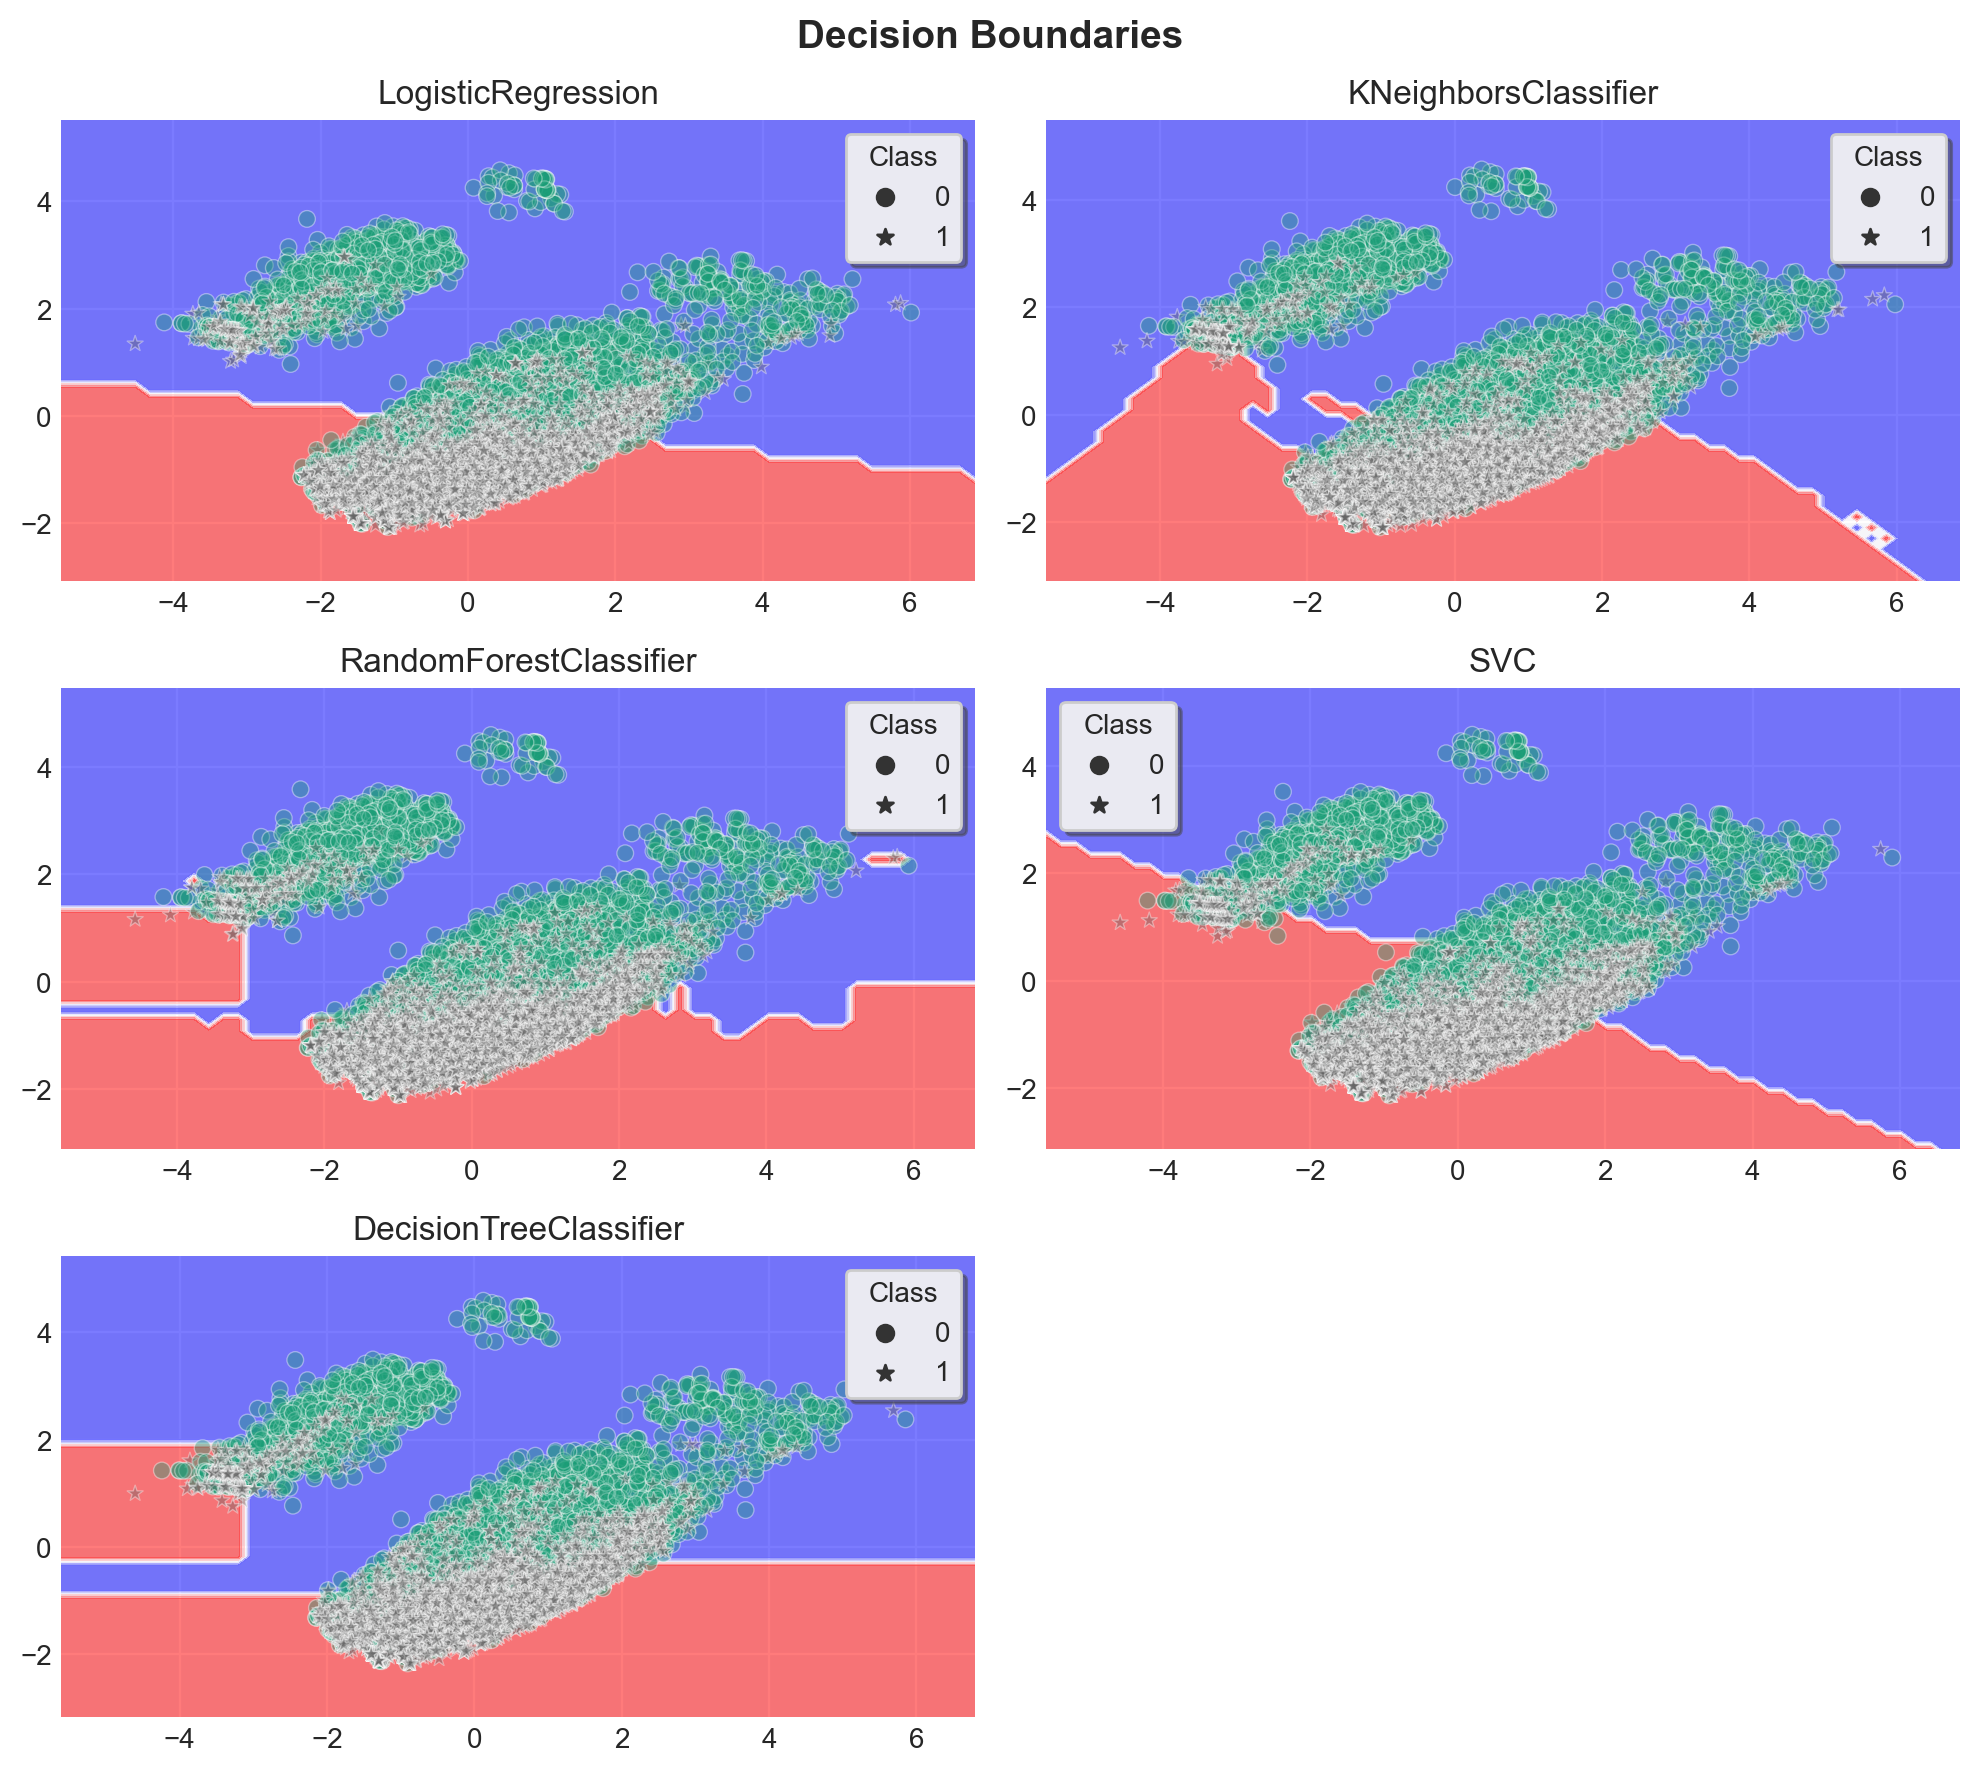

In [92]:
fig1 = plt.figure(dpi=200, figsize=(10, 9), tight_layout=True)

fig1.add_subplot(321)
decision_region_matplotlib(logit_new, x_train, y_train)

fig1.add_subplot(322)
decision_region_matplotlib(knn_new, x_train, y_train)

fig1.add_subplot(323)
decision_region_matplotlib(rfc_new, x_train, y_train)

fig1.add_subplot(324)
decision_region_matplotlib(svc_new, x_train, y_train)

fig1.add_subplot(325)
decision_region_matplotlib(dt_new, x_train, y_train)


fig1.suptitle('Decision Boundaries', fontsize = 14, fontweight  = 'bold')
plt.show()

# Thank you for reading this notebook

# Watch out for more!!